In [117]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Grades of Students dataset
Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description    --  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

·       All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam



 

Predict   CGPA of a student based on different grades in four years.

Downlaod Files:
https://github.com/dsrscientist/dataset4
https://github.com/dsrscientist/dataset4/blob/main/Grades.csv

importing required libraries

In [118]:
#Grades=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
#Grades

In [119]:
Grades=pd.read_csv('Grades.csv')

In [120]:
Grades

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [121]:
Grades.shape

(571, 43)

In [122]:
Grades.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [123]:
Grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [124]:
Grades.columns = Grades.columns.str.replace(' ', '_')
Grades.columns

Index(['Seat_No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [125]:
#Detect Missing Values
Grades.isnull().sum()     

Seat_No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

<AxesSubplot:>

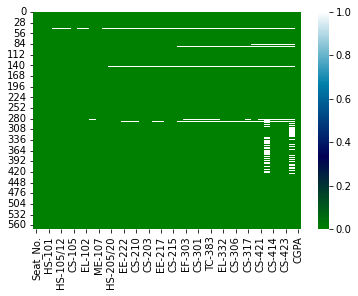

In [126]:
sns.heatmap(Grades.isnull(),cmap="ocean")

<AxesSubplot:>

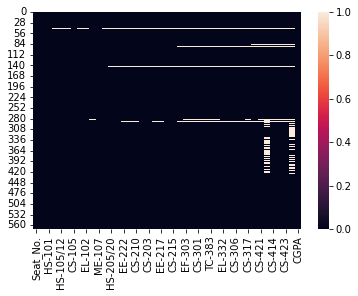

In [127]:
sns.heatmap(Grades.isnull())

In [129]:
df=Grades

In [130]:
# Filling NaN values in Catagorical columns 

df['CY-105'] = df['CY-105'].fillna(df['CY-105'].mode()[0])
df['HS-105/12'] = df['HS-105/12'].fillna(df['HS-105/12'].mode()[0])
df['MT-111'] = df['MT-111'].fillna(df['MT-111'].mode()[0])
df['CS-106'] = df['CS-106'].fillna(df['CS-106'].mode()[0])
df['EL-102']=df['EL-102'].fillna(df['EL-102'].mode()[0])
df['EE-119'] = df['EE-119'].fillna(df['EE-119'].mode()[0])
df['ME-107'] = df['ME-107'].fillna(df['ME-107'].mode()[0])
df['CS-107'] = df['CS-107'].fillna(df['CS-107'].mode()[0])
df['HS-205/20'] = df['HS-205/20'].fillna(df['HS-205/20'].mode()[0])
df['MT-222']=df['MT-222'].fillna(df['MT-222'].mode()[0])
df['EE-222'] = df['EE-222'].fillna(df['EE-222'].mode()[0])
df['MT-224'] = df['MT-224'].fillna(df['MT-224'].mode()[0])
df['CS-210'] = df['CS-210'].fillna(df['CS-210'].mode()[0])
df['CS-211'] = df['CS-211'].fillna(df['CS-211'].mode()[0])
df['CS-203']=df['CS-203'].fillna(df['CS-203'].mode()[0])
df['CS-214'] = df['CS-214'].fillna(df['CS-214'].mode()[0])
df['EE-217'] = df['EE-217'].fillna(df['EE-217'].mode()[0])
df['CS-212'] = df['CS-212'].fillna(df['CS-212'].mode()[0])
df['CS-215'] = df['CS-215'].fillna(df['CS-215'].mode()[0])
df['MT-331']=df['MT-331'].fillna(df['MT-331'].mode()[0])
df['EF-303'] = df['EF-303'].fillna(df['EF-303'].mode()[0])
df['HS-304'] = df['HS-304'].fillna(df['HS-304'].mode()[0])
df['CS-301'] = df['CS-301'].fillna(df['CS-301'].mode()[0])
df['CS-302'] = df['CS-302'].fillna(df['CS-302'].mode()[0])
df['TC-383']=df['TC-383'].fillna(df['TC-383'].mode()[0])
df['MT-442'] = df['MT-442'].fillna(df['MT-442'].mode()[0])
df['EL-332'] = df['EL-332'].fillna(df['EL-332'].mode()[0])
df['CS-318'] = df['CS-318'].fillna(df['CS-318'].mode()[0])
df['CS-306'] = df['CS-306'].fillna(df['CS-306'].mode()[0])
df['CS-312']=df['CS-312'].fillna(df['CS-312'].mode()[0])
df['CS-317'] = df['CS-317'].fillna(df['CS-317'].mode()[0])
df['CS-403'] = df['CS-403'].fillna(df['CS-403'].mode()[0])
df['CS-421'] = df['CS-421'].fillna(df['CS-421'].mode()[0])
df['CS-406'] = df['CS-406'].fillna(df['CS-406'].mode()[0])
df['CS-414']=df['CS-414'].fillna(df['CS-414'].mode()[0])
df['CS-419'] = df['CS-419'].fillna(df['CS-419'].mode()[0])
df['CS-423'] = df['CS-423'].fillna(df['CS-423'].mode()[0])
df['CS-412'] = df['CS-412'].fillna(df['CS-412'].mode()[0])

In [131]:
Grades.isnull().sum()

Seat_No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [132]:
Grades.duplicated().sum()

0

No Duplicate values

In [133]:
#dropping duplicate rows if any  and resetting index
Grades=Grades.drop_duplicates()
print('Number of rows after removing duplicates=', len(Grades))

Number of rows after removing duplicates= 571


In [134]:

Grades['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

<AxesSubplot:xlabel='CGPA', ylabel='count'>

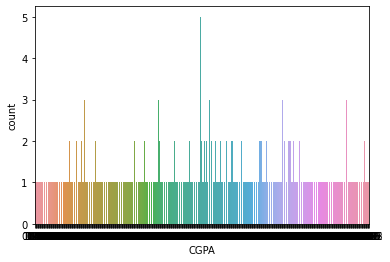

In [18]:
sns.countplot(data=Grades,x='CGPA')

In [135]:
Grades['CGPA'].value_counts(normalize=True)

3.019    0.008757
3.058    0.005254
2.793    0.005254
3.443    0.005254
2.206    0.005254
           ...   
2.555    0.001751
2.042    0.001751
2.634    0.001751
2.053    0.001751
1.753    0.001751
Name: CGPA, Length: 491, dtype: float64

In [136]:
Grades['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

In [137]:
# Checking number of unique values in each column
df.nunique().to_frame("No of Unique Values")

No of Unique Values
Seat_No.                   571
PH-121                      13
HS-101                      12
CY-105                      13
HS-105/12                   13
MT-111                      13
CS-105                      11
CS-106                      13
EL-102                      13
EE-119                      12
ME-107                      13
CS-107                      14
HS-205/20                   13
MT-222                      14
EE-222                      13
MT-224                      14
CS-210                      14
CS-211                      14
CS-203                      13
CS-214                      13
EE-217                      13
CS-212                      12
CS-215                      14
MT-331                      12
EF-303                      12
HS-304                      14
CS-301                      12
CS-302                      11
TC-383                      12
MT-442                      12
EL-332                      13
CS-318                      14
CS-306                      13
CS-312                      14
CS-317                      12
CS-403                      11
CS-421                      13
CS-406                      14
CS-414                      13
CS-419                      12
CS-423                      12
CS-412                      13
CGPA                       491

# EDA

In [138]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Grades.columns:
    if Grades[i].dtypes=='object':
        Grades[i]=enc.fit_transform(Grades[i].values.reshape(-1,1))
Grades.tail(20)

Seat_No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
551     551.0     0.0     5.0     0.0        4.0     0.0     0.0     4.0   
552     552.0     5.0     6.0     0.0        4.0     8.0     0.0     3.0   
553     553.0     0.0     3.0     1.0        7.0     0.0     0.0     2.0   
554     554.0     4.0     8.0     1.0        7.0     3.0     2.0     4.0   
555     555.0     5.0     6.0     0.0        5.0     8.0     3.0     3.0   
556     556.0     0.0     4.0     1.0        0.0     0.0     4.0     2.0   
557     557.0     4.0     7.0     3.0        2.0     5.0     4.0     4.0   
558     558.0     2.0     5.0     0.0        0.0     2.0     0.0     4.0   
559     559.0     2.0     7.0     0.0        3.0     3.0     2.0     7.0   
560     560.0     4.0     8.0     0.0       10.0     7.0     2.0     8.0   
561     561.0     5.0     3.0     2.0        4.0     5.0     4.0     2.0   
562     562.0     3.0     3.0     0.0        6.0     3.0     4.0     3.0   
563     563.0     2.0     3.0     0.0       10.0     4.0     2.0     6.0   
564     564.0     2.0     9.0     0.0        6.0     4.0     4.0     6.0   
565     565.0    11.0    11.0     9.0        8.0     2.0    10.0     9.0   
566     566.0     3.0     0.0     0.0        2.0     1.0     0.0     2.0   
567     567.0     1.0     0.0     0.0        0.0     0.0     0.0     0.0   
568     568.0     3.0     0.0     2.0        4.0     0.0     0.0     0.0   
569     569.0     0.0     4.0     9.0        0.0     9.0    10.0     5.0   
570     570.0     6.0     9.0     9.0        6.0     6.0    10.0     3.0   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
551     4.0     0.0  ...     4.0     5.0     0.0     6.0     4.0     6.0   
552     6.0     3.0  ...     7.0     6.0     4.0    11.0    10.0     8.0   
553     0.0     5.0  ...     2.0     4.0     0.0     4.0     0.0     7.0   
554     6.0     4.0  ...     2.0     7.0     0.0     3.0     3.0     3.0   
555     5.0     8.0  ...     9.0     8.0     3.0     8.0     7.0     5.0   
556     3.0     2.0  ...     0.0     2.0     0.0     4.0     0.0     3.0   
557     6.0     3.0  ...     8.0     6.0     2.0     6.0     7.0    10.0   
558     2.0     4.0  ...     4.0     4.0     0.0     3.0     6.0     9.0   
559     9.0     3.0  ...     4.0     5.0     0.0     2.0     0.0     6.0   
560     7.0     7.0  ...     4.0     6.0     4.0     8.0     8.0    11.0   
561     0.0     3.0  ...     4.0     5.0     4.0    10.0     7.0     5.0   
562     8.0     4.0  ...     2.0     3.0     4.0     4.0     4.0     7.0   
563     0.0     7.0  ...     4.0     6.0     4.0     8.0     8.0     6.0   
564     2.0     5.0  ...     3.0     7.0     4.0    10.0     6.0     8.0   
565     2.0     2.0  ...     1.0     5.0     0.0     3.0     2.0     0.0   
566     2.0     1.0  ...     2.0     2.0     0.0     0.0     0.0     4.0   
567     2.0     0.0  ...     4.0     4.0     0.0     0.0     2.0     3.0   
568     0.0     0.0  ...     2.0     3.0     0.0     4.0     0.0     6.0   
569     8.0     5.0  ...     9.0     3.0     3.0     8.0     9.0     6.0   
570     7.0     6.0  ...     7.0     6.0     5.0     9.0    11.0     8.0   

     CS-419  CS-423  CS-412   CGPA  
551     5.0     6.0     5.0  3.218  
552     3.0     9.0    10.0  2.406  
553     2.0     3.0     2.0  3.491  
554     4.0     8.0     3.0  2.880  
555     4.0    10.0     5.0  2.206  
556     0.0     4.0     0.0  3.624  
557     3.0     8.0     6.0  2.429  
558     2.0    10.0     6.0  3.172  
559     4.0     4.0     2.0  3.226  
560     6.0     9.0     8.0  2.370  
561     4.0     6.0     7.0  2.828  
562     2.0    10.0     7.0  2.821  
563    11.0     9.0     6.0  2.612  
564     3.0     6.0     5.0  2.607  
565     2.0     2.0     2.0  0.800  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  
570     4.0     9.0     8.0  1.753  

[20 rows x 43 columns]

In [139]:
Grades

Seat_No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0         0.0     5.0    10.0     8.0        6.0     8.0    10.0     9.0   
1         1.0     0.0     9.0    10.0        9.0     5.0     6.0     9.0   
2         2.0     0.0     3.0     0.0        5.0     4.0     0.0     5.0   
3         3.0     9.0     7.0    10.0        9.0     9.0     2.0    10.0   
4         4.0     2.0     2.0     2.0        4.0     0.0     0.0     2.0   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566     566.0     3.0     0.0     0.0        2.0     1.0     0.0     2.0   
567     567.0     1.0     0.0     0.0        0.0     0.0     0.0     0.0   
568     568.0     3.0     0.0     2.0        4.0     0.0     0.0     0.0   
569     569.0     0.0     4.0     9.0        0.0     9.0    10.0     5.0   
570     570.0     6.0     9.0     9.0        6.0     6.0    10.0     3.0   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       8.0     5.0  ...     8.0     8.0     8.0     8.0     2.0     0.0   
1       0.0    10.0  ...    10.0     9.0     6.0     9.0     2.0     5.0   
2       4.0     2.0  ...     3.0     3.0     0.0     6.0     0.0     0.0   
3       8.0     9.0  ...    10.0     6.0    10.0     8.0     5.0     3.0   
4       4.0     0.0  ...     5.0     4.0     4.0     5.0     2.0     0.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566     2.0     1.0  ...     2.0     2.0     0.0     0.0     0.0     4.0   
567     2.0     0.0  ...     4.0     4.0     0.0     0.0     2.0     3.0   
568     0.0     0.0  ...     2.0     3.0     0.0     4.0     0.0     6.0   
569     8.0     5.0  ...     9.0     3.0     3.0     8.0     9.0     6.0   
570     7.0     6.0  ...     7.0     6.0     5.0     9.0    11.0     8.0   

     CS-419  CS-423  CS-412   CGPA  
0       8.0     3.0     2.0  2.205  
1       6.0     6.0     3.0  2.008  
2       0.0     2.0     0.0  3.608  
3       7.0     7.0     7.0  1.906  
4       2.0     2.0     0.0  3.448  
..      ...     ...     ...    ...  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  
570     4.0     9.0     8.0  1.753  

[571 rows x 43 columns]

In [140]:
Grades.dtypes

Seat_No.     float64
PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object

Data visuialization

Univariate Analysis

[Text(0.5, 1.0, 'Seat_No'), Text(0.5, 0, 'PH-121'), Text(0, 0.5, 'HS-101')]

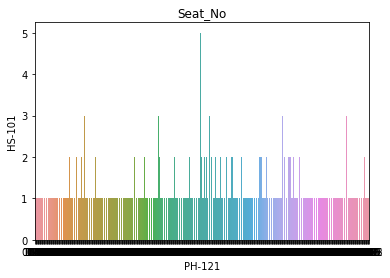

In [25]:
plt = sns.countplot(x='CGPA',data=Grades)
plt.set(title='Seat_No',xlabel='PH-121',ylabel='HS-101')

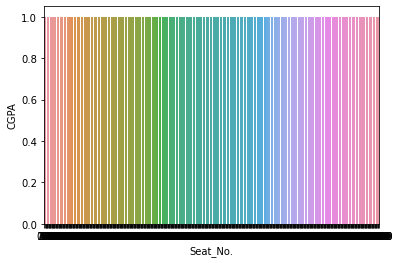

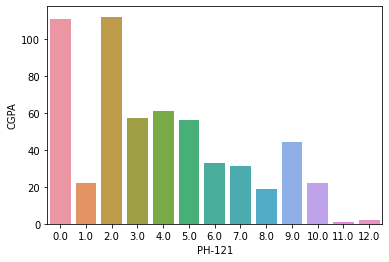

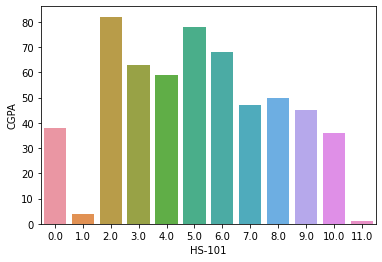

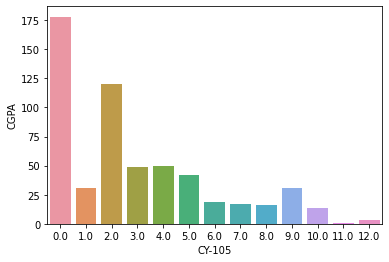

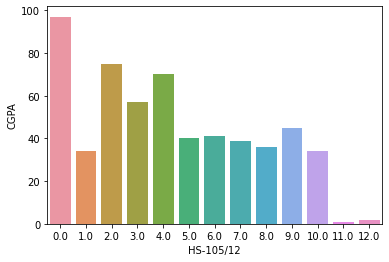

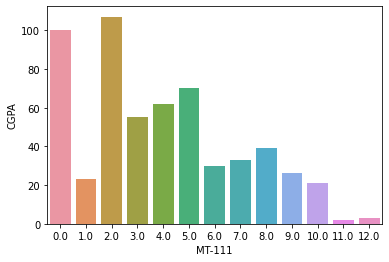

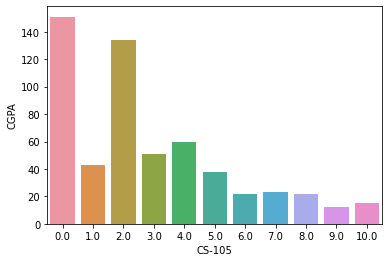

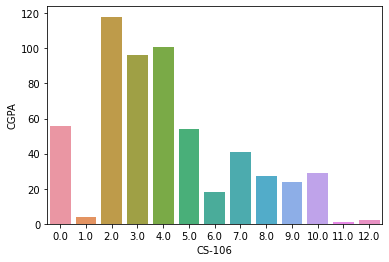

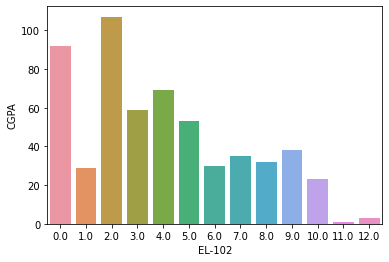

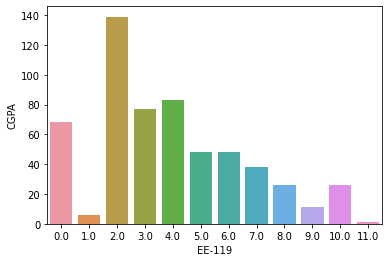

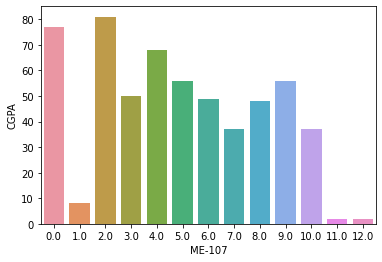

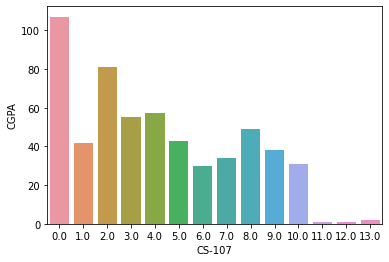

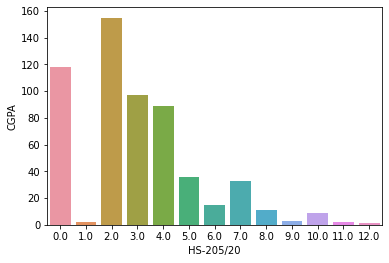

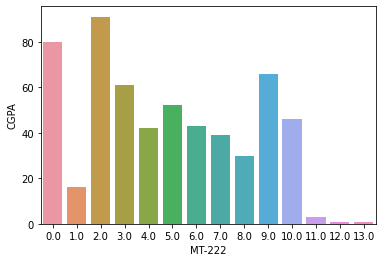

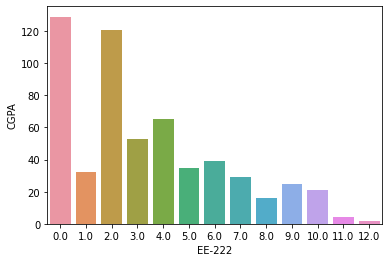

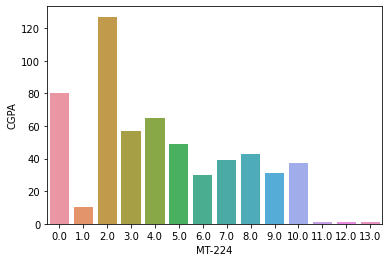

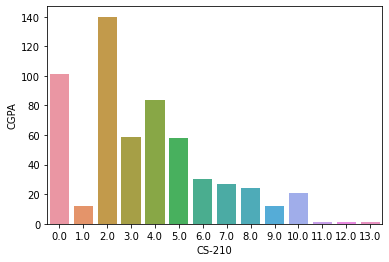

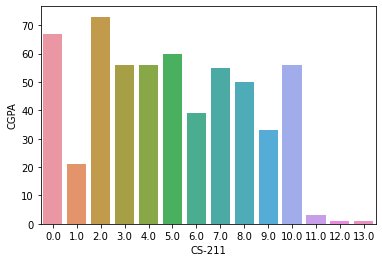

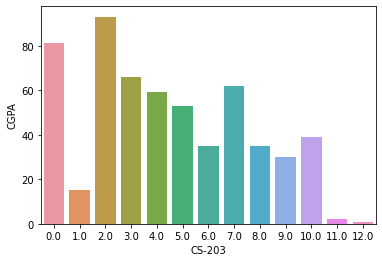

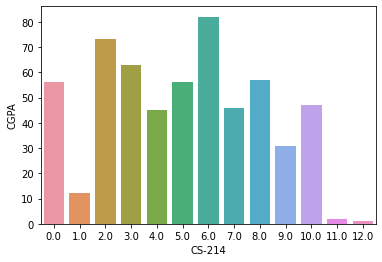

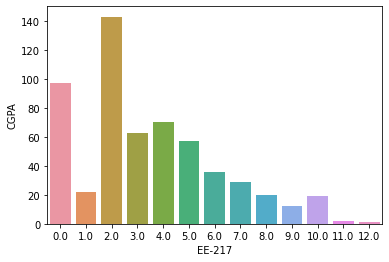

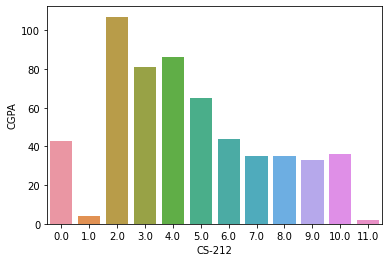

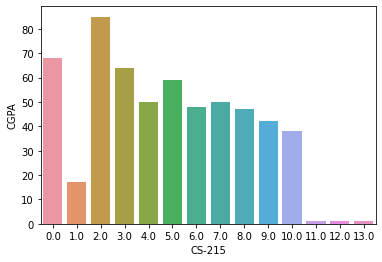

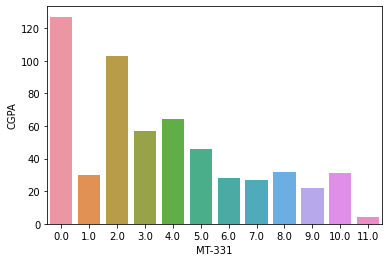

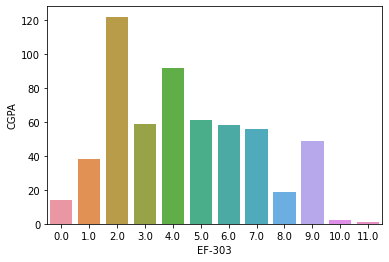

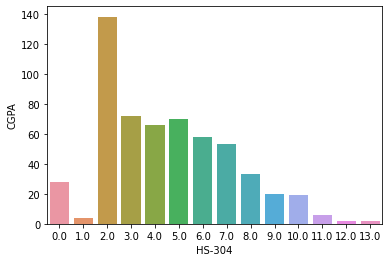

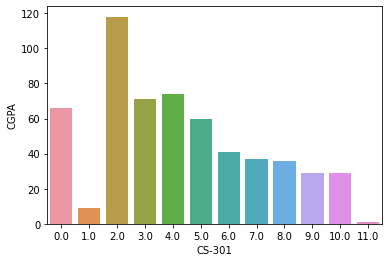

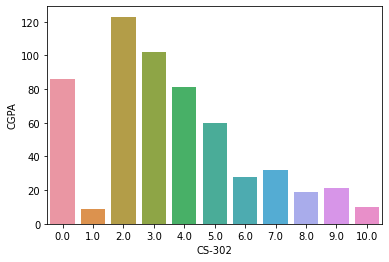

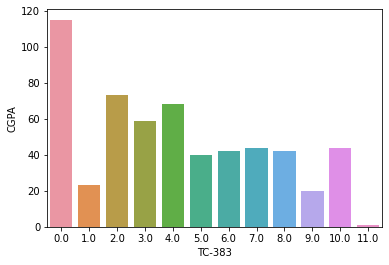

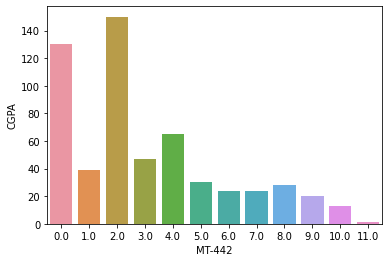

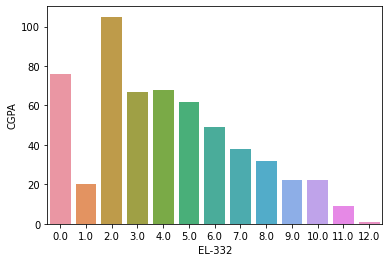

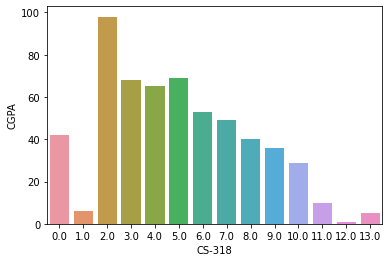

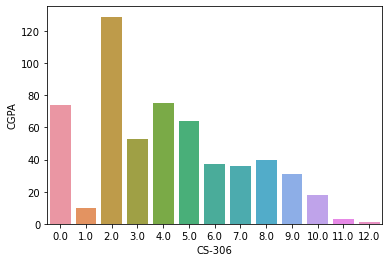

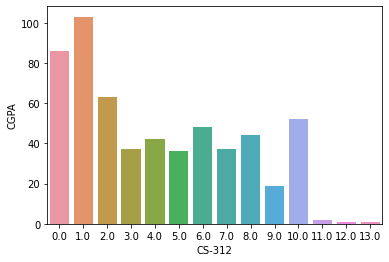

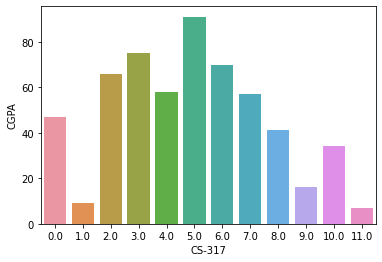

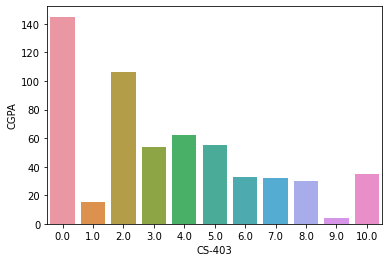

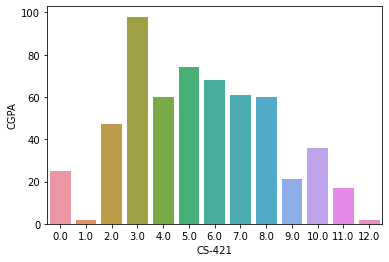

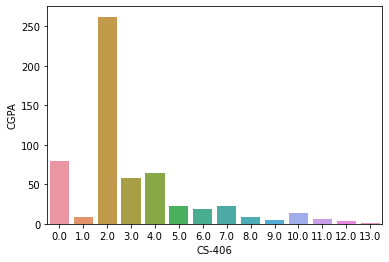

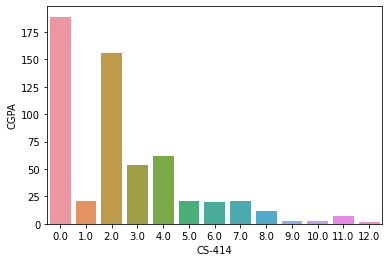

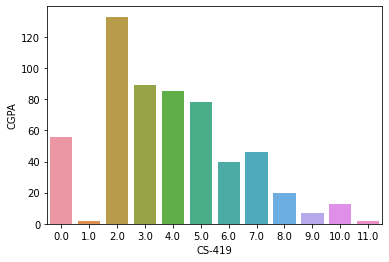

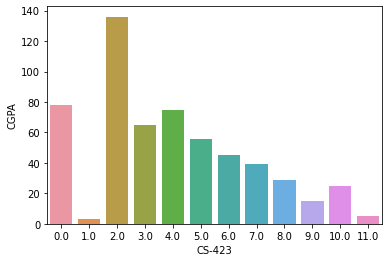

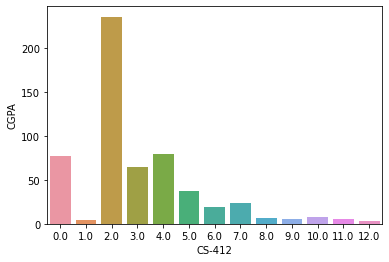

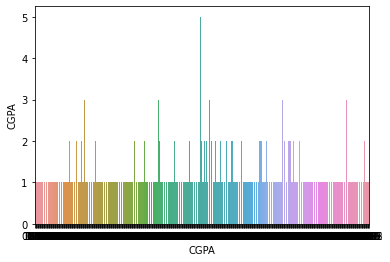

In [26]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
for column in Grades.columns:
    sns.countplot(x=column, data=Grades)
    plt.xlabel(column)
    plt.ylabel('CGPA')
    plt.show()

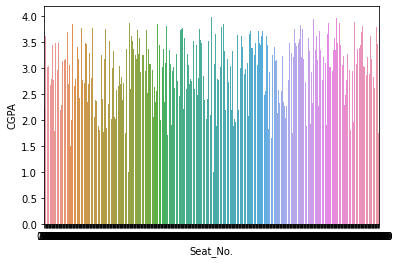

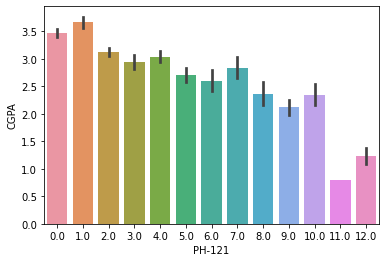

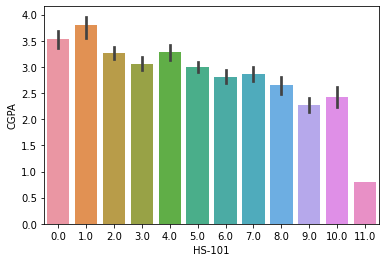

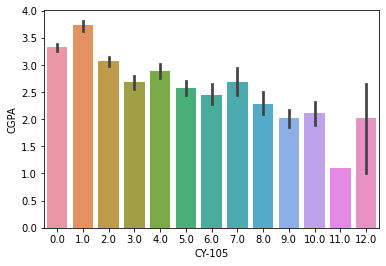

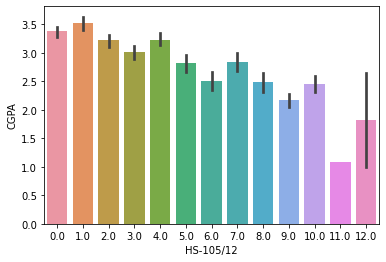

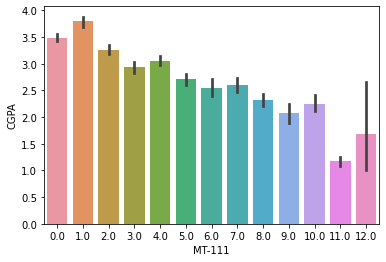

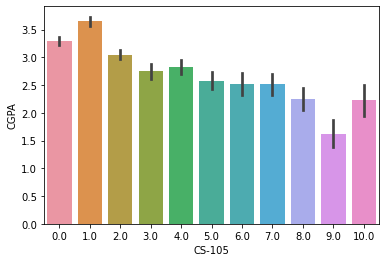

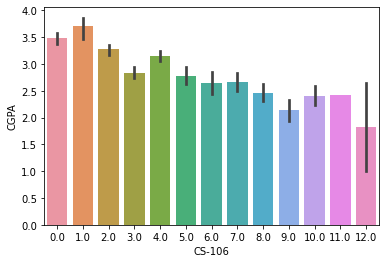

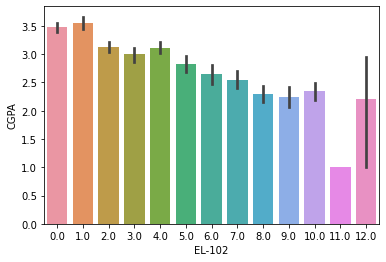

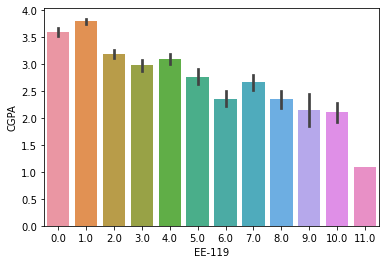

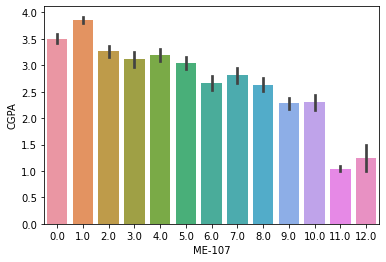

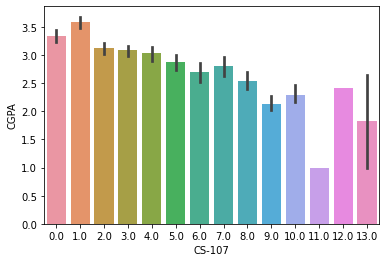

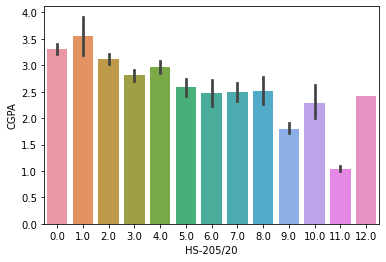

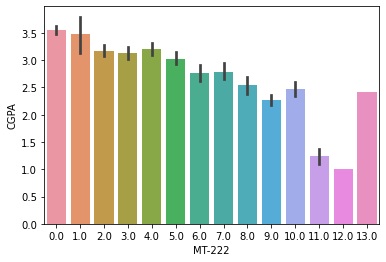

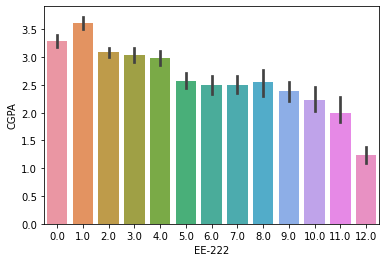

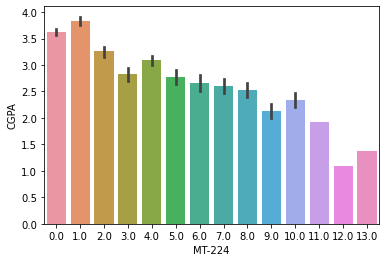

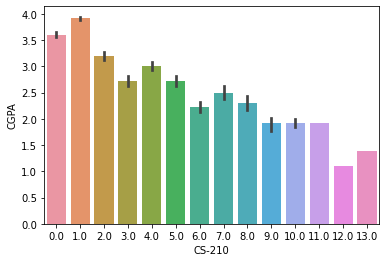

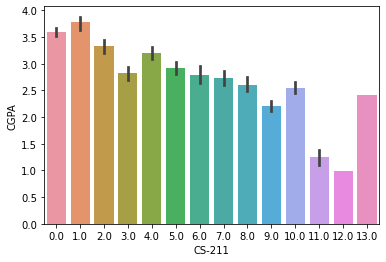

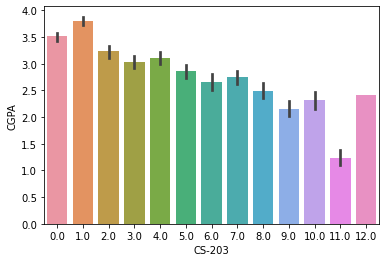

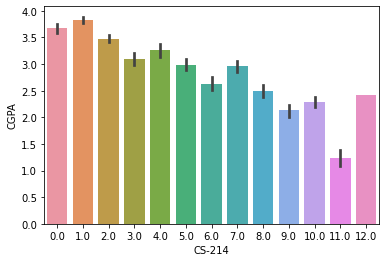

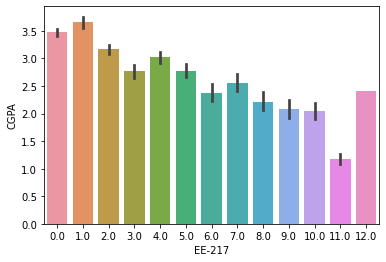

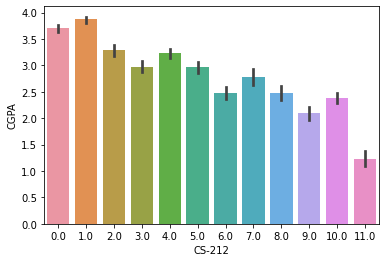

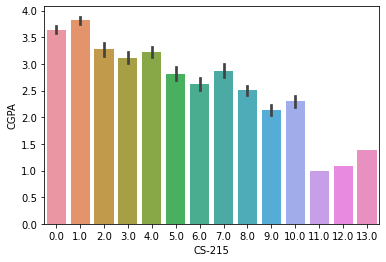

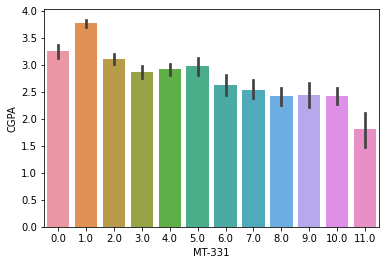

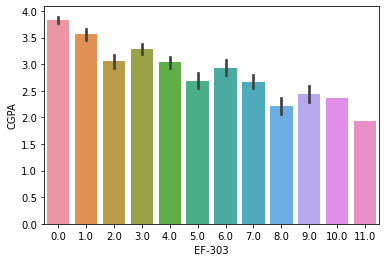

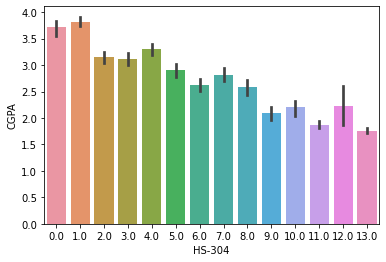

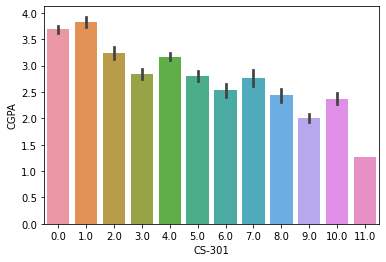

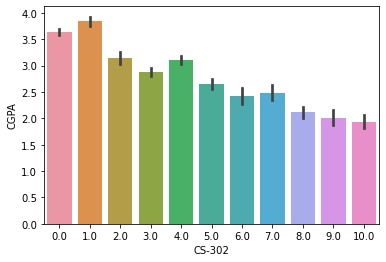

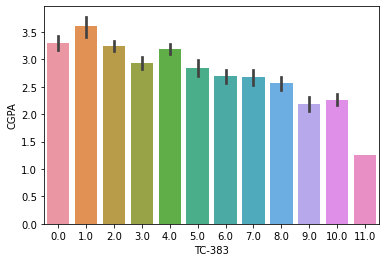

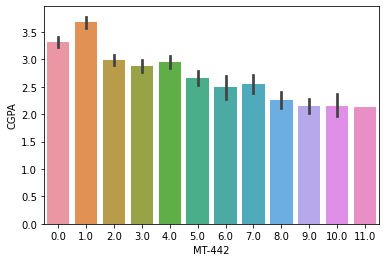

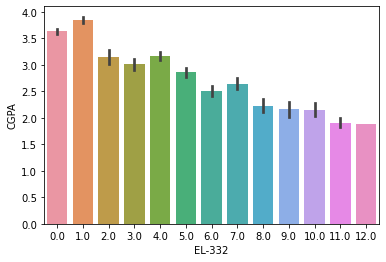

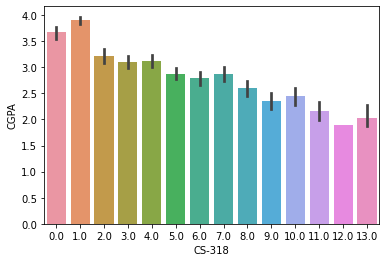

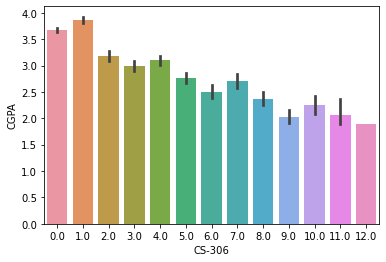

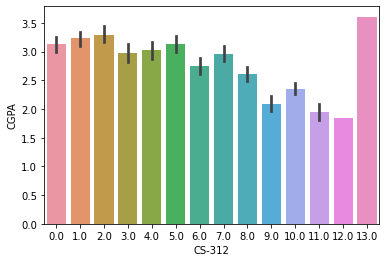

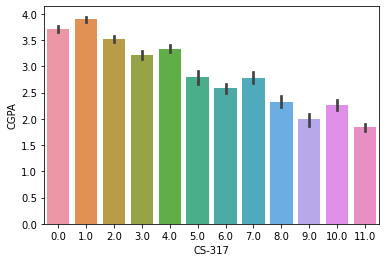

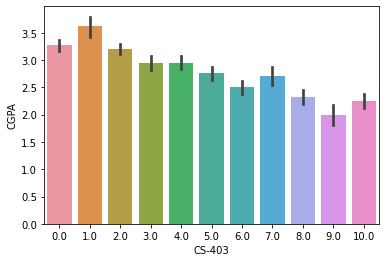

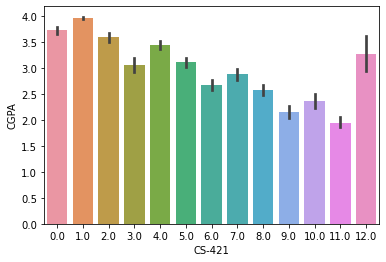

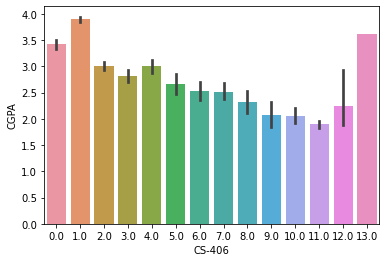

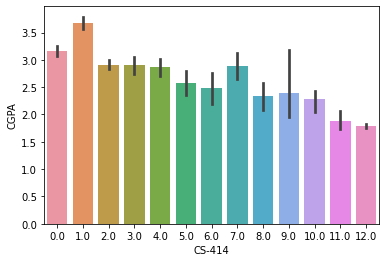

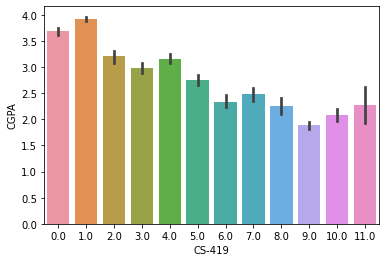

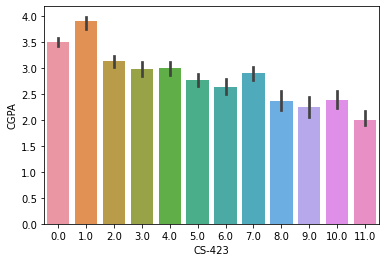

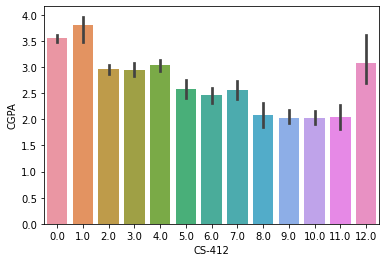

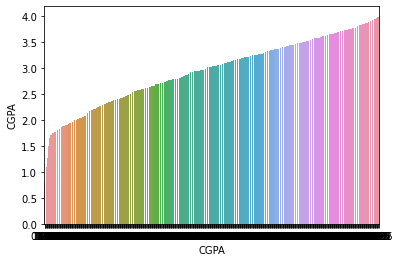

In [27]:
for column in Grades.columns:
    sns.barplot(x=column, y='CGPA', data=Grades)
    plt.xlabel(column)
    plt.show()

Now Lets See that counts of each columns

In [141]:
Grades

Seat_No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0         0.0     5.0    10.0     8.0        6.0     8.0    10.0     9.0   
1         1.0     0.0     9.0    10.0        9.0     5.0     6.0     9.0   
2         2.0     0.0     3.0     0.0        5.0     4.0     0.0     5.0   
3         3.0     9.0     7.0    10.0        9.0     9.0     2.0    10.0   
4         4.0     2.0     2.0     2.0        4.0     0.0     0.0     2.0   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566     566.0     3.0     0.0     0.0        2.0     1.0     0.0     2.0   
567     567.0     1.0     0.0     0.0        0.0     0.0     0.0     0.0   
568     568.0     3.0     0.0     2.0        4.0     0.0     0.0     0.0   
569     569.0     0.0     4.0     9.0        0.0     9.0    10.0     5.0   
570     570.0     6.0     9.0     9.0        6.0     6.0    10.0     3.0   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0       8.0     5.0  ...     8.0     8.0     8.0     8.0     2.0     0.0   
1       0.0    10.0  ...    10.0     9.0     6.0     9.0     2.0     5.0   
2       4.0     2.0  ...     3.0     3.0     0.0     6.0     0.0     0.0   
3       8.0     9.0  ...    10.0     6.0    10.0     8.0     5.0     3.0   
4       4.0     0.0  ...     5.0     4.0     4.0     5.0     2.0     0.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566     2.0     1.0  ...     2.0     2.0     0.0     0.0     0.0     4.0   
567     2.0     0.0  ...     4.0     4.0     0.0     0.0     2.0     3.0   
568     0.0     0.0  ...     2.0     3.0     0.0     4.0     0.0     6.0   
569     8.0     5.0  ...     9.0     3.0     3.0     8.0     9.0     6.0   
570     7.0     6.0  ...     7.0     6.0     5.0     9.0    11.0     8.0   

     CS-419  CS-423  CS-412   CGPA  
0       8.0     3.0     2.0  2.205  
1       6.0     6.0     3.0  2.008  
2       0.0     2.0     0.0  3.608  
3       7.0     7.0     7.0  1.906  
4       2.0     2.0     0.0  3.448  
..      ...     ...     ...    ...  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  
570     4.0     9.0     8.0  1.753  

[571 rows x 43 columns]

In [142]:
Grades.hist(bins=10, figsize=(20,20))

array([[<AxesSubplot:title={'center':'Seat_No.'}>,
        <AxesSubplot:title={'center':'PH-121'}>,
        <AxesSubplot:title={'center':'HS-101'}>,
        <AxesSubplot:title={'center':'CY-105'}>,
        <AxesSubplot:title={'center':'HS-105/12'}>,
        <AxesSubplot:title={'center':'MT-111'}>,
        <AxesSubplot:title={'center':'CS-105'}>],
       [<AxesSubplot:title={'center':'CS-106'}>,
        <AxesSubplot:title={'center':'EL-102'}>,
        <AxesSubplot:title={'center':'EE-119'}>,
        <AxesSubplot:title={'center':'ME-107'}>,
        <AxesSubplot:title={'center':'CS-107'}>,
        <AxesSubplot:title={'center':'HS-205/20'}>,
        <AxesSubplot:title={'center':'MT-222'}>],
       [<AxesSubplot:title={'center':'EE-222'}>,
        <AxesSubplot:title={'center':'MT-224'}>,
        <AxesSubplot:title={'center':'CS-210'}>,
        <AxesSubplot:title={'center':'CS-211'}>,
        <AxesSubplot:title={'center':'CS-203'}>,
        <AxesSubplot:title={'center':'CS-214'}>,
        <A

Error in callback <function flush_figures at 0x000001EACF206160> (for post_execute):


KeyboardInterrupt: 

In [30]:
plt.figure(figsize=(25,30))
sns.pairplot(Grades)
plt.show()

<Figure size 1800x2160 with 0 Axes>

In [143]:
for i in Grades.columns:
        print(Grades[i].value_counts())
        print('*'*100)

0.0      1
383.0    1
377.0    1
378.0    1
379.0    1
        ..
184.0    1
183.0    1
182.0    1
181.0    1
570.0    1
Name: Seat_No., Length: 571, dtype: int64
****************************************************************************************************
2.0     112
0.0     111
4.0      61
3.0      57
5.0      56
9.0      44
6.0      33
7.0      31
10.0     22
1.0      22
8.0      19
12.0      2
11.0      1
Name: PH-121, dtype: int64
****************************************************************************************************
2.0     82
5.0     78
6.0     68
3.0     63
4.0     59
8.0     50
7.0     47
9.0     45
0.0     38
10.0    36
1.0      4
11.0     1
Name: HS-101, dtype: int64
****************************************************************************************************
0.0     178
2.0     120
4.0      50
3.0      49
5.0      42
9.0      31
1.0      31
6.0      19
7.0      17
8.0      16
10.0     14
12.0      3
11.0      1
Name: CY-105, dtype: int64
*********

<AxesSubplot:>

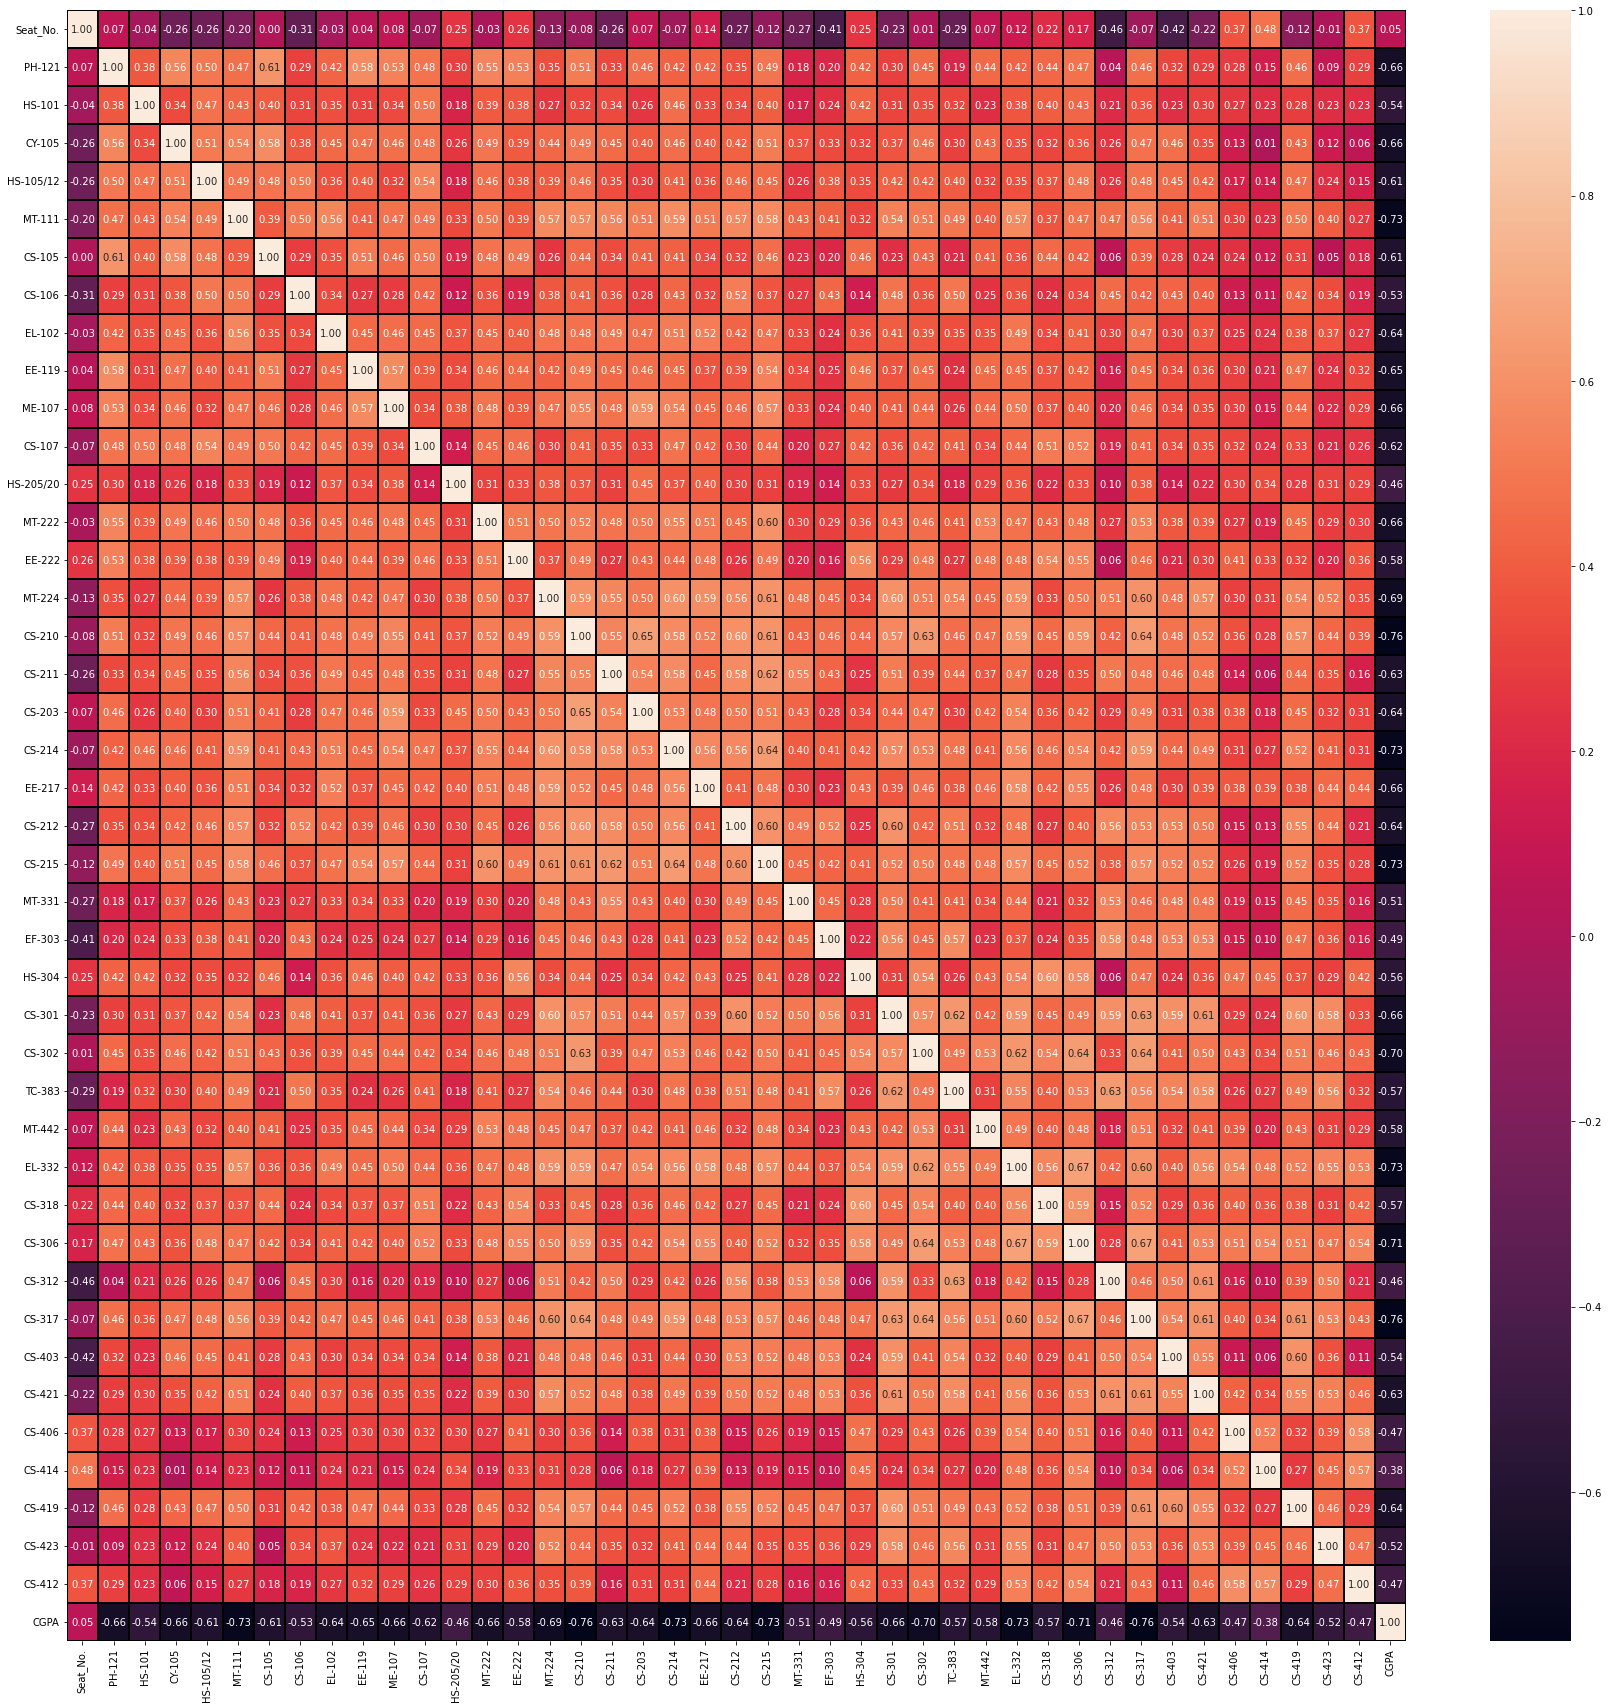

In [144]:
plt.figure(figsize = (30,30))
sns.heatmap(Grades.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

lighter colour shows more positive corelation and darker colour shows negitive corelation.

Standard error shows negitive corelation compare to all other attributes.

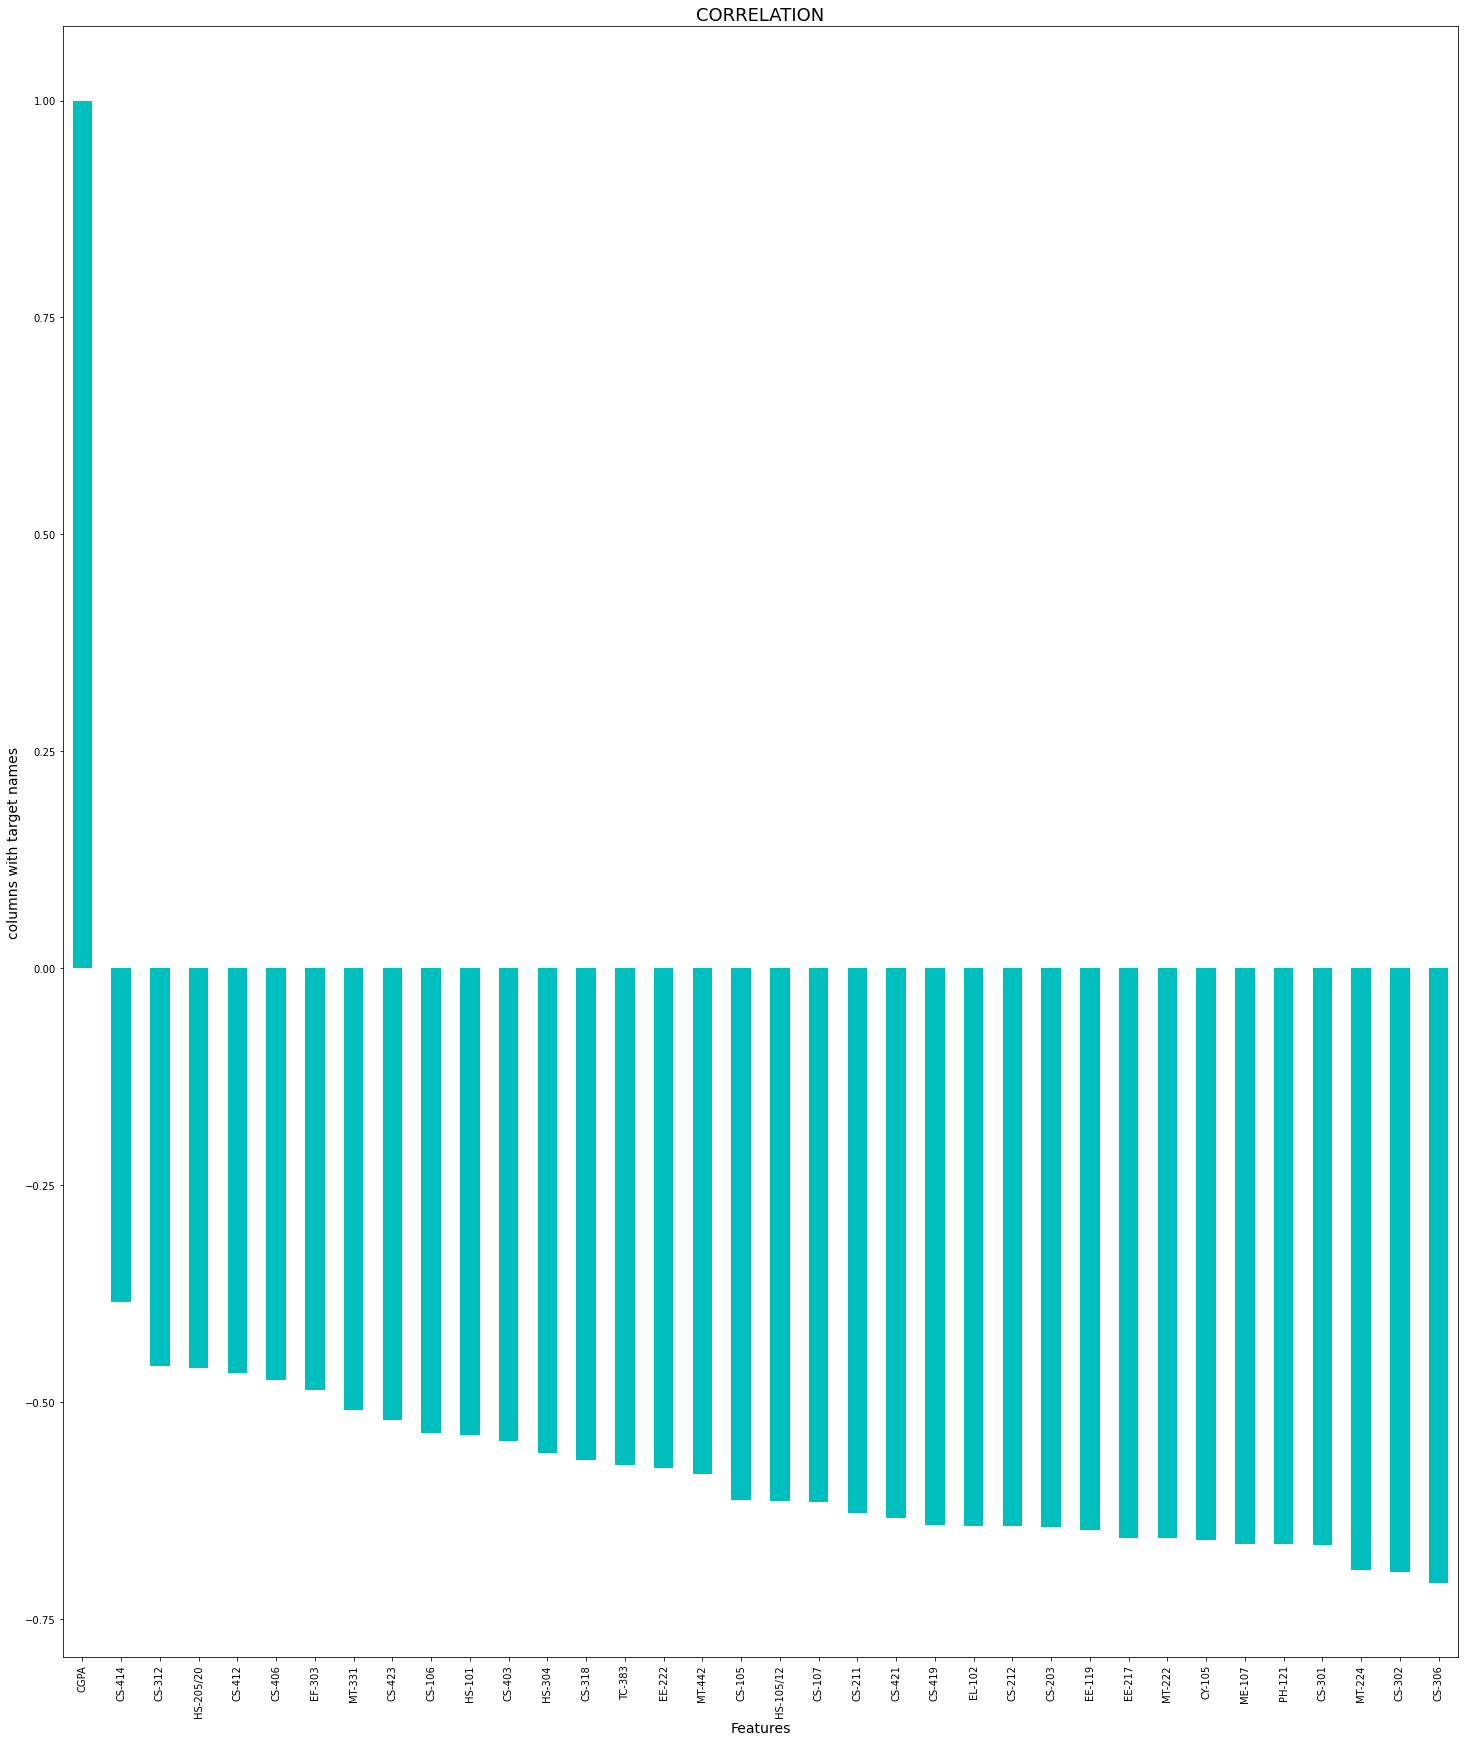

In [250]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Grades.corr()['CGPA'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [251]:
Grades.corr()

PH-121    HS-101    CY-105  HS-105/12    CS-105    CS-106  \
PH-121     1.000000  0.382436  0.557843   0.498561  0.609990  0.293963   
HS-101     0.382436  1.000000  0.335074   0.473132  0.400713  0.312019   
CY-105     0.557843  0.335074  1.000000   0.510123  0.578573  0.378223   
HS-105/12  0.498561  0.473132  0.510123   1.000000  0.482406  0.499093   
CS-105     0.609990  0.400713  0.578573   0.482406  1.000000  0.286324   
CS-106     0.293963  0.312019  0.378223   0.499093  0.286324  1.000000   
EL-102     0.423942  0.349412  0.447539   0.360304  0.353949  0.338645   
EE-119     0.579964  0.309697  0.467250   0.400303  0.507357  0.269895   
ME-107     0.533558  0.336545  0.464418   0.320137  0.455470  0.281233   
CS-107     0.477761  0.495906  0.481277   0.540405  0.503239  0.422237   
HS-205/20  0.296428  0.178344  0.261281   0.179766  0.192982  0.115335   
MT-222     0.551805  0.391699  0.485371   0.459571  0.477302  0.362293   
EE-222     0.529273  0.381091  0.394398   0.379369  0.487650  0.185709   
MT-224     0.348024  0.265585  0.437339   0.392068  0.259561  0.383993   
CS-211     0.329882  0.335788  0.453911   0.352640  0.342449  0.358101   
CS-203     0.462853  0.263205  0.400036   0.295711  0.410614  0.284932   
EE-217     0.423468  0.328305  0.398219   0.357855  0.339227  0.322608   
CS-212     0.351823  0.340568  0.420848   0.455820  0.321335  0.521584   
MT-331     0.183034  0.173494  0.366648   0.259306  0.231626  0.271685   
EF-303     0.196272  0.240540  0.334633   0.384338  0.196685  0.434706   
HS-304     0.420629  0.418026  0.323331   0.345015  0.456401  0.136400   
CS-301     0.300945  0.313397  0.368489   0.415815  0.230551  0.482070   
CS-302     0.448213  0.345292  0.460447   0.419373  0.426776  0.361257   
TC-383     0.189226  0.320385  0.300547   0.397499  0.214507  0.496586   
MT-442     0.443980  0.226441  0.430456   0.320701  0.407767  0.246647   
CS-318     0.441321  0.404702  0.322503   0.373775  0.444708  0.236944   
CS-306     0.472384  0.432533  0.362537   0.484828  0.418766  0.338987   
CS-312     0.038184  0.213380  0.261555   0.263143  0.059711  0.450752   
CS-403     0.321264  0.229546  0.464575   0.451907  0.279329  0.426402   
CS-421     0.290351  0.301934  0.349827   0.415946  0.236345  0.397195   
CS-406     0.280166  0.265551  0.129957   0.168150  0.237615  0.129554   
CS-414     0.152437  0.225977  0.008774   0.142806  0.121965  0.108916   
CS-419     0.462770  0.284668  0.430053   0.465352  0.306827  0.421989   
CS-423     0.094921  0.228103  0.120885   0.235029  0.045134  0.339963   
CS-412     0.293815  0.226039  0.064912   0.153293  0.179777  0.185782   
CGPA      -0.663135 -0.537170 -0.658282  -0.613989 -0.613169 -0.534995   

             EL-102    EE-119    ME-107    CS-107  ...    CS-306    CS-312  \
PH-121     0.423942  0.579964  0.533558  0.477761  ...  0.472384  0.038184   
HS-101     0.349412  0.309697  0.336545  0.495906  ...  0.432533  0.213380   
CY-105     0.447539  0.467250  0.464418  0.481277  ...  0.362537  0.261555   
HS-105/12  0.360304  0.400303  0.320137  0.540405  ...  0.484828  0.263143   
CS-105     0.353949  0.507357  0.455470  0.503239  ...  0.418766  0.059711   
CS-106     0.338645  0.269895  0.281233  0.422237  ...  0.338987  0.450752   
EL-102     1.000000  0.448908  0.461690  0.454290  ...  0.411977  0.301324   
EE-119     0.448908  1.000000  0.572964  0.390834  ...  0.419649  0.156809   
ME-107     0.461690  0.572964  1.000000  0.341957  ...  0.401833  0.199848   
CS-107     0.454290  0.390834  0.341957  1.000000  ...  0.519140  0.191575   
HS-205/20  0.368922  0.339430  0.382366  0.141581  ...  0.333987  0.103594   
MT-222     0.451722  0.455881  0.478592  0.447459  ...  0.478310  0.265200   
EE-222     0.402440  0.444792  0.392467  0.461250  ...  0.546802  0.059889   
MT-224     0.482855  0.418834  0.471195  0.303788  ...  0.496459  0.505537   
CS-211     0.491606  0.448275  0.478886  0.352076  ...  0.348610  0.504395   
CS-203     0.469012  0.462

In [252]:
Grades.corr()['CGPA'].sort_values()

CS-306      -0.708299
CS-302      -0.696112
MT-224      -0.692696
CS-301      -0.664117
PH-121      -0.663135
ME-107      -0.663023
CY-105      -0.658282
MT-222      -0.656320
EE-217      -0.655993
EE-119      -0.646829
CS-203      -0.644191
CS-212      -0.642878
EL-102      -0.642262
CS-419      -0.641804
CS-421      -0.633001
CS-211      -0.628070
CS-107      -0.615309
HS-105/12   -0.613989
CS-105      -0.613169
MT-442      -0.582592
EE-222      -0.575335
TC-383      -0.572329
CS-318      -0.566393
HS-304      -0.557912
CS-403      -0.544543
HS-101      -0.537170
CS-106      -0.534995
CS-423      -0.520968
MT-331      -0.508428
EF-303      -0.485478
CS-406      -0.474419
CS-412      -0.466512
HS-205/20   -0.460525
CS-312      -0.458019
CS-414      -0.384003
CGPA         1.000000
Name: CGPA, dtype: float64

plt.figure(figsize=(25,30))
sns.pairplot(Grades)
plt.show()

All the datasets are different and have no Multicollinearity

# DESCRIPTIVE STATSTICS

In [253]:
Grades.describe()

PH-121      HS-101      CY-105   HS-105/12      CS-105      CS-106  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     3.781086    5.071804    2.898424    4.241681    2.838879    4.122592   
std      3.046895    2.785317    2.964737    3.200507    2.696709    2.727192   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    3.000000    0.000000    2.000000    0.000000    2.000000   
50%      3.000000    5.000000    2.000000    4.000000    2.000000    4.000000   
75%      6.000000    7.000000    4.500000    7.000000    4.000000    5.000000   
max     12.000000   11.000000   12.000000   12.000000   10.000000   12.000000   

           EL-102      EE-119      ME-107      CS-107  ...      CS-306  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean     3.959720    3.886165    4.779335    4.068301  ...    4.106830   
std      3.031436    2.657528    3.146202    3.260701  ...    2.855123   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      2.000000    2.000000    2.000000    1.000000  ...    2.000000   
50%      3.000000    3.000000    5.000000    4.000000  ...    4.000000   
75%      6.000000    6.000000    8.000000    7.000000  ...    6.000000   
max     12.000000   11.000000   12.000000   13.000000  ...   12.000000   

           CS-312      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     4.071804    3.432574    5.385289    2.984238    2.397548    3.856392   
std      3.362345    2.980685    2.729063    2.468346    2.499388    2.382769   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    3.000000    2.000000    0.000000    2.000000   
50%      3.000000    3.000000    5.000000    2.000000    2.000000    4.000000   
75%      7.000000    5.000000    7.000000    4.000000    4.000000    5.000000   
max     13.000000   10.000000   12.000000   13.000000   12.000000   11.000000   

           CS-423      CS-412        CGPA  
count  571.000000  571.000000  571.000000  
mean     3.966725    3.049037    2.954888  
std      2.795475    2.332316    0.620552  
min      0.000000    0.000000    0.800000  
25%      2.000000    2.000000    2.538000  
50%      4.000000    2.000000    3.029000  
75%      6.000000    4.000000    3.451000  
max     11.000000   12.000000    3.985000  

[8 rows x 36 columns]

In [254]:
Grades.describe().T

count      mean       std  min    25%    50%    75%     max
PH-121     571.0  3.781086  3.046895  0.0  2.000  3.000  6.000  12.000
HS-101     571.0  5.071804  2.785317  0.0  3.000  5.000  7.000  11.000
CY-105     571.0  2.898424  2.964737  0.0  0.000  2.000  4.500  12.000
HS-105/12  571.0  4.241681  3.200507  0.0  2.000  4.000  7.000  12.000
CS-105     571.0  2.838879  2.696709  0.0  0.000  2.000  4.000  10.000
CS-106     571.0  4.122592  2.727192  0.0  2.000  4.000  5.000  12.000
EL-102     571.0  3.959720  3.031436  0.0  2.000  3.000  6.000  12.000
EE-119     571.0  3.886165  2.657528  0.0  2.000  3.000  6.000  11.000
ME-107     571.0  4.779335  3.146202  0.0  2.000  5.000  8.000  12.000
CS-107     571.0  4.068301  3.260701  0.0  1.000  4.000  7.000  13.000
HS-205/20  571.0  2.975482  2.352176  0.0  2.000  3.000  4.000  12.000
MT-222     571.0  4.714536  3.300842  0.0  2.000  4.000  8.000  13.000
EE-222     571.0  3.390543  2.988254  0.0  1.000  3.000  5.000  12.000
MT-224     571.0  4.241681  3.080968  0.0  2.000  4.000  7.000  13.000
CS-211     571.0  4.891419  3.189695  0.0  2.000  5.000  8.000  13.000
CS-203     571.0  4.409807  3.077965  0.0  2.000  4.000  7.000  12.000
EE-217     571.0  3.455342  2.696200  0.0  2.000  3.000  5.000  12.000
CS-212     571.0  4.549912  2.776887  0.0  2.000  4.000  6.000  11.000
MT-331     571.0  3.604203  3.094009  0.0  1.000  3.000  6.000  11.000
EF-303     571.0  4.371278  2.471341  0.0  2.000  4.000  6.000  11.000
HS-304     571.0  4.516637  2.659175  0.0  2.000  4.000  6.000  13.000
CS-301     571.0  4.218914  2.841928  0.0  2.000  4.000  6.000  11.000
CS-302     571.0  3.534151  2.504762  0.0  2.000  3.000  5.000  10.000
TC-383     571.0  4.106830  3.190029  0.0  2.000  4.000  7.000  11.000
MT-442     571.0  3.059545  2.772033  0.0  1.000  2.000  4.000  11.000
CS-318     571.0  4.891419  2.960935  0.0  2.000  5.000  7.000  13.000
CS-306     571.0  4.106830  2.855123  0.0  2.000  4.000  6.000  12.000
CS-312     571.0  4.071804  3.362345  0.0  1.000  3.000  7.000  13.000
CS-403     571.0  3.432574  2.980685  0.0  0.000  3.000  5.000  10.000
CS-421     571.0  5.385289  2.729063  0.0  3.000  5.000  7.000  12.000
CS-406     571.0  2.984238  2.468346  0.0  2.000  2.000  4.000  13.000
CS-414     571.0  2.397548  2.499388  0.0  0.000  2.000  4.000  12.000
CS-419     571.0  3.856392  2.382769  0.0  2.000  4.000  5.000  11.000
CS-423     571.0  3.966725  2.795475  0.0  2.000  4.000  6.000  11.000
CS-412     571.0  3.049037  2.332316  0.0  2.000  2.000  4.000  12.000
CGPA       571.0  2.954888  0.620552  0.8  2.538  3.029  3.451   3.985

<AxesSubplot:>

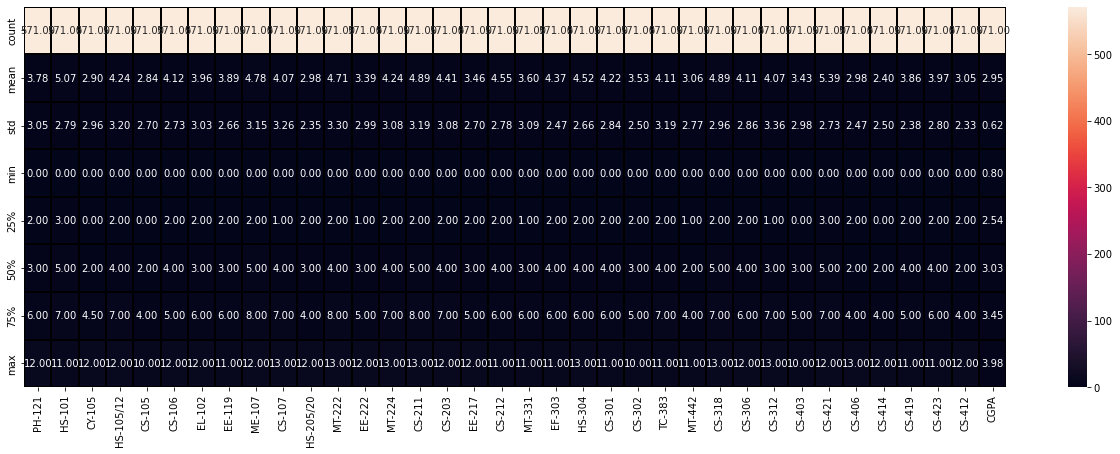

In [255]:
plt.figure(figsize = (22,7))
sns.heatmap(Grades.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Outcome of describe() of dataset :-
from the above plotting we are determining mean,standard deviation,minimum,25%,50%,75% percentle and maximum value of each column

Total number rows and column in dataset

Rows :- 1359
columns :- 12

Economy_(GDP_per_Capita)==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.846137,0.403121,0.00000,0.545808,0.910245	1.158448,1.69042

Family==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223

Health_(Life_Expectancy)==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.630259,0.247078,0.00000,0.439185,0.696705	0.811013,1.02525

Freedom==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.428615,0.150693,,0.00000,0.328330,0.435515,0.549092,0.66973

Trust_(Government_Corruption)==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.143422,0.120034,0.00000,0.061675,0.107220	0.180255,0.55191

Generosity==(Mean,std,minimum,25%,50%,75% ,Maximum)=0.23729,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588

TDystopia_Residual==(Mean,std,minimum,25%,50%,75% ,Maximum)==2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [256]:
Grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 570
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     571 non-null    float64
 3   HS-105/12  571 non-null    float64
 4   CS-105     571 non-null    float64
 5   CS-106     571 non-null    float64
 6   EL-102     571 non-null    float64
 7   EE-119     571 non-null    float64
 8   ME-107     571 non-null    float64
 9   CS-107     571 non-null    float64
 10  HS-205/20  571 non-null    float64
 11  MT-222     571 non-null    float64
 12  EE-222     571 non-null    float64
 13  MT-224     571 non-null    float64
 14  CS-211     571 non-null    float64
 15  CS-203     571 non-null    float64
 16  EE-217     571 non-null    float64
 17  CS-212     571 non-null    float64
 18  MT-331     571 non-null    float64
 19  EF-303     571 non-null    float64
 20  HS-304    

OUTLIERS CHECKING(Any One outlier method can be  used)

In [257]:
# Firstly lets drop seat No. as it is of no use

Grades=Grades.drop(['Seat_No.'],axis=1)

KeyError: "['Seat_No.'] not found in axis"

In [ ]:
colmlist=Grades.columns.values
ncol=30
nrows=14

In [ ]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= Grades[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
# to find out outliers in the dataset
Grades.plot(kind='box',subplots=True,figsize=(20,10))

In [258]:
Grades.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-211       0.116085
CS-203       0.274205
EE-217       0.724325
CS-212       0.414872
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

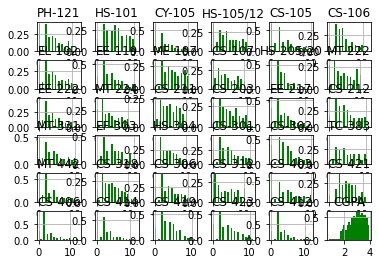

In [259]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
Grades.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

<AxesSubplot:xlabel='CS-412', ylabel='Density'>

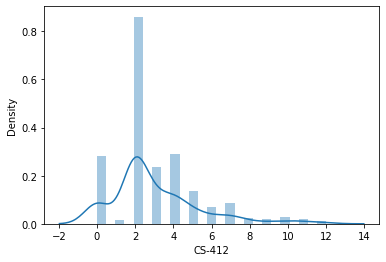

In [260]:
sns.distplot(Grades['CS-412'])

<AxesSubplot:xlabel='ME-107', ylabel='Density'>

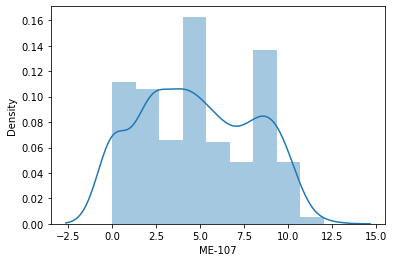

In [160]:
 sns.distplot(Grades['ME-107'])
    

the data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..
we can see that the data is not normally distributed

Normal distribution curve of outcome column is irrelevent

In [ ]:
sns.distplot(Grades['HS-304'])
    

In [ ]:
sns.distplot(Grades['CS-301'])

In [261]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore(Grades)) < 3).all()

PH-121        True
HS-101        True
CY-105       False
HS-105/12     True
CS-105        True
CS-106        True
EL-102        True
EE-119        True
ME-107        True
CS-107        True
HS-205/20    False
MT-222        True
EE-222        True
MT-224        True
CS-211        True
CS-203        True
EE-217       False
CS-212        True
MT-331        True
EF-303        True
HS-304       False
CS-301        True
CS-302        True
TC-383        True
MT-442        True
CS-318        True
CS-306        True
CS-312        True
CS-403        True
CS-421        True
CS-406       False
CS-414       False
CS-419       False
CS-423        True
CS-412       False
CGPA         False
dtype: bool

In [263]:
#to remove outliers in data set through zscore
z = np.abs(zscore(Grades))
z.shape

(571, 36)

In [264]:
threshold = 3
print(np.where(z>3))

(array([ 60,  60,  60, 137, 143, 143, 281, 281, 288, 288, 340, 340, 352,
       352, 382, 387, 387, 410, 423, 424, 432, 446, 447, 447, 453, 453,
       454, 454, 454, 509, 513, 516, 516, 521, 522, 522, 527, 543, 543,
       550, 550, 557, 560, 563, 565, 570], dtype=int64), array([ 2, 10, 16,  2,  2, 35, 10, 35, 10, 35, 20, 31, 20, 31, 31, 31, 34,
       31, 31, 31, 34, 30, 30, 31, 30, 34, 30, 31, 32, 30, 34, 30, 34, 30,
       30, 34, 34, 30, 34, 31, 34, 31, 31, 32, 35, 30], dtype=int64))


In [265]:
Grades_new=Grades[(z<3).all(axis=1)]
print(Grades.shape)
print(Grades_new.shape)


(571, 36)
(541, 36)


In [266]:
Grades.shape

(571, 36)

In [267]:
Grades_new.shape

(541, 36)

In [268]:
print ("Old DataFrame =",Grades.shape)
print ("New DataFrame =",Grades_new.shape)
print ("Total dropped rows = ",Grades.shape[0] - Grades_new.shape[0])

Old DataFrame = (571, 36)
New DataFrame = (541, 36)
Total dropped rows =  30


In [269]:
#find % loss in data
loss=(571-540)/571*100
print(loss)

5.42907180385289


In [270]:
Grades_new

PH-121  HS-101  CY-105  HS-105/12  CS-105  CS-106  EL-102  EE-119  \
0       5.0    10.0     8.0        6.0    10.0     9.0     8.0     5.0   
1       0.0     9.0    10.0        9.0     6.0     9.0     0.0    10.0   
2       0.0     3.0     0.0        5.0     0.0     5.0     4.0     2.0   
3       9.0     7.0    10.0        9.0     2.0    10.0     8.0     9.0   
4       2.0     2.0     2.0        4.0     0.0     2.0     4.0     0.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
564     2.0     9.0     0.0        6.0     4.0     6.0     2.0     5.0   
566     3.0     0.0     0.0        2.0     0.0     2.0     2.0     1.0   
567     1.0     0.0     0.0        0.0     0.0     0.0     2.0     0.0   
568     3.0     0.0     2.0        4.0     0.0     0.0     0.0     0.0   
569     0.0     4.0     9.0        0.0    10.0     5.0     8.0     5.0   

     ME-107  CS-107  ...  CS-306  CS-312  CS-403  CS-421  CS-406  CS-414  \
0       8.0     8.0  ...     6.0     8.0     8.0     8.0     2.0     0.0   
1       9.0     4.0  ...     9.0    10.0     6.0     9.0     2.0     5.0   
2       2.0     5.0  ...     2.0     3.0     0.0     6.0     0.0     0.0   
3       7.0     9.0  ...     8.0    10.0    10.0     8.0     5.0     3.0   
4       2.0     6.0  ...     2.0     5.0     4.0     5.0     2.0     0.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
564     9.0     4.0  ...     8.0     3.0     4.0    10.0     6.0     8.0   
566     4.0     1.0  ...     4.0     2.0     0.0     0.0     0.0     4.0   
567     0.0     1.0  ...     2.0     4.0     0.0     0.0     2.0     3.0   
568     3.0     1.0  ...     4.0     2.0     0.0     4.0     0.0     6.0   
569     8.0     1.0  ...     4.0     9.0     3.0     8.0     9.0     6.0   

     CS-419  CS-423  CS-412   CGPA  
0       8.0     3.0     2.0  2.205  
1       6.0     6.0     3.0  2.008  
2       0.0     2.0     0.0  3.608  
3       7.0     7.0     7.0  1.906  
4       2.0     2.0     0.0  3.448  
..      ...     ...     ...    ...  
564     3.0     6.0     5.0  2.607  
566     4.0     3.0     0.0  3.798  
567     2.0     6.0     2.0  3.772  
568     4.0     2.0     2.0  3.470  
569     3.0     5.0     6.0  2.193  

[541 rows x 36 columns]

In [271]:
# Independent column

x=Grades_new.iloc[:,1:-1]
x

HS-101  CY-105  HS-105/12  CS-105  CS-106  EL-102  EE-119  ME-107  \
0      10.0     8.0        6.0    10.0     9.0     8.0     5.0     8.0   
1       9.0    10.0        9.0     6.0     9.0     0.0    10.0     9.0   
2       3.0     0.0        5.0     0.0     5.0     4.0     2.0     2.0   
3       7.0    10.0        9.0     2.0    10.0     8.0     9.0     7.0   
4       2.0     2.0        4.0     0.0     2.0     4.0     0.0     2.0   
..      ...     ...        ...     ...     ...     ...     ...     ...   
564     9.0     0.0        6.0     4.0     6.0     2.0     5.0     9.0   
566     0.0     0.0        2.0     0.0     2.0     2.0     1.0     4.0   
567     0.0     0.0        0.0     0.0     0.0     2.0     0.0     0.0   
568     0.0     2.0        4.0     0.0     0.0     0.0     0.0     3.0   
569     4.0     9.0        0.0    10.0     5.0     8.0     5.0     8.0   

     CS-107  HS-205/20  ...  CS-318  CS-306  CS-312  CS-403  CS-421  CS-406  \
0       8.0        4.0  ...     8.0     6.0     8.0     8.0     8.0     2.0   
1       4.0        7.0  ...     2.0     9.0    10.0     6.0     9.0     2.0   
2       5.0        2.0  ...     2.0     2.0     3.0     0.0     6.0     0.0   
3       9.0        3.0  ...     4.0     8.0    10.0    10.0     8.0     5.0   
4       6.0        0.0  ...     5.0     2.0     5.0     4.0     5.0     2.0   
..      ...        ...  ...     ...     ...     ...     ...     ...     ...   
564     4.0        3.0  ...     9.0     8.0     3.0     4.0    10.0     6.0   
566     1.0        0.0  ...     0.0     4.0     2.0     0.0     0.0     0.0   
567     1.0        4.0  ...     1.0     2.0     4.0     0.0     0.0     2.0   
568     1.0        5.0  ...     7.0     4.0     2.0     0.0     4.0     0.0   
569     1.0        7.0  ...     5.0     4.0     9.0     3.0     8.0     9.0   

     CS-414  CS-419  CS-423  CS-412  
0       0.0     8.0     3.0     2.0  
1       5.0     6.0     6.0     3.0  
2       0.0     0.0     2.0     0.0  
3       3.0     7.0     7.0     7.0  
4       0.0     2.0     2.0     0.0  
..      ...     ...     ...     ...  
564     8.0     3.0     6.0     5.0  
566     4.0     4.0     3.0     0.0  
567     3.0     2.0     6.0     2.0  
568     6.0     4.0     2.0     2.0  
569     6.0     3.0     5.0     6.0  

[541 rows x 34 columns]

In [272]:
#x=df.loc [:,df.columns != 'CGPA']
# Independent Variable
#x
#y=df.loc[:,'CGPA']
#Dependent Variable

In [273]:
x.shape

(541, 34)

In [274]:
# Target or dependent variable

y=Grades_new.iloc[:,-1]
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
564    2.607
566    3.798
567    3.772
568    3.470
569    2.193
Name: CGPA, Length: 541, dtype: float64

In [275]:
y.shape

(541,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [276]:
Grades.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-211       0.116085
CS-203       0.274205
EE-217       0.724325
CS-212       0.414872
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

In [277]:
Grades_new.skew()

PH-121       0.597811
HS-101       0.074013
CY-105       0.960792
HS-105/12    0.339290
CS-105       0.974935
CS-106       0.627365
EL-102       0.526053
EE-119       0.611847
ME-107       0.123756
CS-107       0.427822
HS-205/20    0.804022
MT-222       0.190323
EE-222       0.752222
MT-224       0.454385
CS-211       0.090919
CS-203       0.287952
EE-217       0.737979
CS-212       0.419008
MT-331       0.667317
EF-303       0.352624
HS-304       0.448965
CS-301       0.421128
CS-302       0.617339
TC-383       0.368170
MT-442       0.872049
CS-318       0.339881
CS-306       0.429559
CS-312       0.445793
CS-403       0.603571
CS-421       0.111827
CS-406       1.357511
CS-414       0.891184
CS-419       0.452855
CS-423       0.501258
CS-412       0.903398
CGPA        -0.406627
dtype: float64

In [278]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Grades_new,method='yeo-johnson')
x_new

array([[ 0.61699477,  1.74803755,  1.46671442, ..., -0.17216065,
        -0.29519995, -1.34991875],
       [-1.5098981 ,  1.42761501,  1.72861903, ...,  0.82851088,
         0.23134681, -1.61025952],
       [-1.5098981 , -0.67648256, -1.27027729, ..., -0.58585896,
        -1.78961822,  1.0774266 ],
       ...,
       [-0.83802784, -1.98474756, -1.27027729, ...,  0.82851088,
        -0.29519995,  1.42851909],
       [ 0.01501029, -1.98474756,  0.06878193, ..., -0.58585896,
        -0.29519995,  0.79310411],
       [-1.5098981 , -0.29573467,  1.60396864, ...,  0.52388764,
         1.46849908, -1.36633092]])

In [279]:
pd.DataFrame(x_new).skew()

0    -0.095296
1    -0.129101
2    -0.013541
3    -0.145498
4    -0.030607
5    -0.042133
6    -0.100465
7    -0.058280
8    -0.185929
9    -0.121241
10   -0.066856
11   -0.173916
12   -0.069183
13   -0.104918
14   -0.191283
15   -0.144906
16   -0.069439
17   -0.066462
18   -0.083660
19   -0.064101
20   -0.044001
21   -0.096194
22   -0.069557
23   -0.146693
24   -0.045571
25   -0.086918
26   -0.102174
27   -0.097201
28   -0.100380
29   -0.081168
30    0.006503
31   -0.034028
32   -0.052929
33   -0.090599
34   -0.011761
35   -0.103746
dtype: float64

In [280]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

HS-101    CY-105  HS-105/12    CS-105    CS-106    EL-102    EE-119  \
0    1.857259  1.836342   0.607289  2.794874  1.856543  1.412153  0.478749   
1    1.489613  2.541174   1.566073  1.260989  1.856543 -1.288597  2.411606   
2   -0.716265 -0.982987   0.287694 -1.039838  0.363027  0.061778 -0.680966   
3    0.754321  2.541174   1.566073 -0.272895  2.229923  1.412153  2.025035   
4   -1.083911 -0.278155  -0.031900 -1.039838 -0.757111  0.061778 -1.454109   
..        ...       ...        ...       ...       ...       ...       ...   
536  1.489613 -0.982987   0.607289  0.494047  0.736406 -0.613410  0.478749   
537 -1.819204 -0.982987  -0.671090 -1.039838 -0.757111 -0.613410 -1.067538   
538 -1.819204 -0.982987  -1.310279 -1.039838 -1.503869 -0.613410 -1.454109   
539 -1.819204 -0.278155  -0.031900 -1.039838 -1.503869 -1.288597 -1.454109   
540 -0.348618  2.188758  -1.310279  2.794874  0.363027  1.412153  0.478749   

       ME-107    CS-107  HS-205/20  ...    CS-318    CS-306    CS-312  \
0    1.076941  1.306351   0.498852  ...  1.103730  0.755669  1.213632   
1    1.399189  0.034671   1.823955  ... -0.966003  1.853656  1.818492   
2   -0.856549  0.352591  -0.384549  ... -0.966003 -0.708313 -0.298517   
3    0.754693  1.624271   0.057152  ... -0.276092  1.487661  1.818492   
4   -0.856549  0.670511  -1.267951  ...  0.068864 -0.708313  0.306343   
..        ...       ...        ...  ...       ...       ...       ...   
536  1.399189  0.034671   0.057152  ...  1.448685  1.487661 -0.298517   
537 -0.212053 -0.919088  -1.267951  ... -1.655913  0.023678 -0.600946   
538 -1.501046 -0.919088   0.498852  ... -1.310958 -0.708313  0.003913   
539 -0.534301 -0.919088   0.940553  ...  0.758774  0.023678 -0.600946   
540  1.076941 -0.919088   1.823955  ...  0.068864  0.023678  1.516062   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0    1.528151  1.064593 -0.349237 -1.032765  1.823654 -0.318241 -0.420014  
1    0.857104  1.448301 -0.349237  1.383869  0.961244  0.780706  0.086061  
2   -1.156037  0.297178 -1.296290 -1.032765 -1.625985 -0.684557 -1.432165  
3    2.199198  1.064593  1.071343  0.417215  1.392449  1.147022  2.110362  
4    0.186057 -0.086529 -0.349237 -1.032765 -0.763575 -0.684557 -1.432165  
..        ...       ...       ...       ...       ...       ...       ...  
536  0.186057  1.832008  1.544870  2.833849 -0.332370  0.780706  1.098212  
537 -1.156037 -2.005066 -1.296290  0.900542  0.098834 -0.318241 -1.432165  
538 -1.156037 -2.005066 -0.349237  0.417215 -0.763575  0.780706 -0.420014  
539 -1.156037 -0.470237 -1.296290  1.867196  0.098834 -0.684557 -0.420014  
540 -0.149466  1.064593  2.965450  1.867196 -0.332370  0.414390  1.604287  

[541 rows x 34 columns]

In [281]:
x.mean()

HS-101      -7.736674e-17
CY-105       2.717071e-16
HS-105/12    2.503645e-17
CS-105       1.707404e-16
CS-106      -3.242426e-16
EL-102       4.432683e-17
EE-119      -1.856186e-16
ME-107      -2.955122e-17
CS-107       9.398931e-17
HS-205/20   -7.551979e-17
MT-222       1.428309e-16
EE-222       3.985311e-16
MT-224       1.621213e-17
CS-211      -1.787439e-16
CS-203       8.747367e-17
EE-217       3.878598e-17
CS-212       3.246530e-16
MT-331      -1.887995e-17
EF-303      -8.352325e-16
HS-304       9.029540e-17
CS-301       3.053626e-16
CS-302      -5.499811e-17
TC-383      -4.904682e-16
MT-442       1.682778e-17
CS-318      -9.611843e-17
CS-306      -1.926088e-16
CS-312       3.476373e-16
CS-403       6.278609e-16
CS-421      -7.231841e-16
CS-406       1.732030e-16
CS-414       6.033375e-16
CS-419      -5.581898e-17
CS-423      -4.391640e-17
CS-412       5.216612e-16
dtype: float64

In [282]:
x.std()

HS-101       1.000925
CY-105       1.000925
HS-105/12    1.000925
CS-105       1.000925
CS-106       1.000925
EL-102       1.000925
EE-119       1.000925
ME-107       1.000925
CS-107       1.000925
HS-205/20    1.000925
MT-222       1.000925
EE-222       1.000925
MT-224       1.000925
CS-211       1.000925
CS-203       1.000925
EE-217       1.000925
CS-212       1.000925
MT-331       1.000925
EF-303       1.000925
HS-304       1.000925
CS-301       1.000925
CS-302       1.000925
TC-383       1.000925
MT-442       1.000925
CS-318       1.000925
CS-306       1.000925
CS-312       1.000925
CS-403       1.000925
CS-421       1.000925
CS-406       1.000925
CS-414       1.000925
CS-419       1.000925
CS-423       1.000925
CS-412       1.000925
dtype: float64

In [283]:
Grades['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

In [284]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

ValueError: Unknown label type: 'continuous'

In [285]:
x.shape

(541, 34)

In [286]:
y.value_counts()

3.019    5
2.206    3
2.756    3
3.058    3
3.772    3
        ..
2.971    1
3.736    1
3.074    1
2.749    1
2.193    1
Name: CGPA, Length: 464, dtype: int64

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [287]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [288]:
vif_cal()

    VIF FACTOR   FEATURES
0     1.739266     HS-101
1     2.403990     CY-105
2     2.230529  HS-105/12
3     2.304023     CS-105
4     1.946283     CS-106
5     1.867911     EL-102
6     2.062621     EE-119
7     2.223874     ME-107
8     2.311201     CS-107
9     1.637575  HS-205/20
10    2.222873     MT-222
11    2.343946     EE-222
12    2.783719     MT-224
13    2.501894     CS-211
14    2.403485     CS-203
15    2.321622     EE-217
16    2.781505     CS-212
17    1.952045     MT-331
18    2.173124     EF-303
19    2.260019     HS-304
20    3.136830     CS-301
21    2.638343     CS-302
22    2.898466     TC-383
23    2.263215     MT-442
24    2.251853     CS-318
25    2.952905     CS-306
26    3.641822     CS-312
27    2.478164     CS-403
28    2.625610     CS-421
29    1.847874     CS-406
30    2.007075     CS-414
31    2.439459     CS-419
32    2.496318     CS-423
33    2.078525     CS-412


# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


#spliting dataset into training(70%) and testing(30%)

In [289]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

In [290]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (378, 34)
shape of y_train: (378, 34)
shape of x_test: (163, 34)
shape of y_test: (163,)


In [291]:
x_train

HS-101    CY-105  HS-105/12    CS-105    CS-106    EL-102    EE-119  \
13   1.121967 -0.278155   1.246479 -0.272895  1.109785 -0.613410 -0.680966   
428  0.386674 -0.982987  -0.990685 -0.272895 -0.757111  1.412153 -0.680966   
325  0.754321  0.426678   1.885668  2.027932 -1.503869 -0.613410  2.411606   
122  1.489613  1.483926   0.926884  0.494047  1.109785  0.061778  0.092177   
148  0.754321 -0.278155  -0.671090 -1.039838  0.363027  1.412153  0.865320   
..        ...       ...        ...       ...       ...       ...       ...   
398  1.489613  0.074261  -0.351495  1.260989 -0.383732  0.061778  2.025035   
15   1.121967  0.779094   1.566073  0.494047  0.363027 -0.613410 -0.294395   
377  0.386674  1.131510   0.287694  1.260989 -0.010352  0.399371  0.865320   
163 -0.348618 -0.982987  -1.310279 -0.656367 -1.503869  1.074559  0.092177   
414 -1.083911 -0.982987  -0.671090 -0.656367  0.363027 -1.288597 -0.680966   

       ME-107    CS-107  HS-205/20  ...    CS-318    CS-306    CS-312  \
13  -0.856549  1.306351  -1.267951  ... -0.966003 -0.708313 -0.298517   
428  0.110196 -0.283248   0.057152  ...  0.413819  1.487661 -1.205806   
325  1.399189  1.306351  -0.384549  ...  1.103730  0.389674 -1.205806   
122  0.110196  0.034671   0.057152  ...  1.103730  0.023678  1.818492   
148  0.110196 -0.601168   0.498852  ... -0.276092 -0.708313  1.818492   
..        ...       ...        ...  ...       ...       ...       ...   
398  1.076941  0.670511  -0.384549  ...  1.103730  0.023678 -1.205806   
15  -0.856549  0.670511   0.057152  ...  0.413819  0.389674 -0.298517   
377  0.754693 -0.283248   0.498852  ...  0.758774 -0.342318 -1.205806   
163 -0.856549 -1.237008  -1.267951  ... -0.966003 -0.708313  0.003913   
414 -0.856549 -0.601168   0.057152  ... -0.621047 -0.708313 -0.903376   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
13  -0.484990 -0.470237 -0.349237 -1.032765 -1.625985 -0.684557 -1.432165  
428 -1.156037 -0.853944  1.071343  0.417215  0.098834  0.780706  1.098212  
325  0.186057  0.680886 -0.349237 -0.066111  1.392449  0.048075  1.098212  
122  0.521581  1.064593 -0.349237 -0.066111  0.961244  1.147022  0.086061  
148  0.521581  1.064593 -0.349237 -0.066111 -0.763575  2.245969  1.604287  
..        ...       ...       ...       ...       ...       ...       ...  
398  0.186057 -0.853944 -0.349237 -0.066111 -0.332370 -1.417188  0.592136  
15   0.521581  0.680886 -0.349237 -0.066111  1.392449  1.513337 -0.420014  
377 -0.484990 -0.853944 -0.349237 -0.066111 -0.332370 -0.684557  0.086061  
163 -0.484990 -1.237652 -0.349237 -1.032765 -0.763575 -0.684557 -1.432165  
414 -1.156037 -2.005066 -0.822763  0.900542  0.098834  0.048075 -0.420014  

[378 rows x 34 columns]

In [292]:
y_test

526    2.659
182    3.736
495    3.576
347    3.689
510    3.240
       ...  
317    3.033
336    3.615
226    3.664
179    3.076
443    3.137
Name: CGPA, Length: 163, dtype: float64

In [293]:
x_test

HS-101    CY-105  HS-105/12    CS-105    CS-106    EL-102    EE-119  \
504  0.386674 -0.278155   0.607289  0.494047  0.363027  1.749746  0.478749   
179 -1.083911 -0.278155  -1.310279 -0.272895 -1.503869 -0.275816 -0.680966   
478 -1.819204 -0.982987  -0.031900 -0.272895 -1.503869  0.399371 -1.454109   
341 -0.716265 -0.982987  -0.031900 -1.039838 -0.010352 -1.288597 -0.680966   
492  1.121967 -0.982987  -0.351495  0.110576 -0.010352  1.749746  0.092177   
..        ...       ...        ...       ...       ...       ...       ...   
312  0.019028  0.074261  -0.671090  0.494047 -0.010352 -0.613410  1.251892   
331 -0.348618 -0.982987   0.926884  0.110576 -0.010352  0.061778 -0.680966   
223 -1.819204 -0.982987  -0.990685 -0.656367 -1.503869 -0.613410 -0.680966   
176 -0.348618  0.779094  -0.990685 -0.272895 -0.010352 -0.275816  0.865320   
430 -0.716265 -0.982987  -0.351495 -1.039838 -0.383732 -0.613410 -0.294395   

       ME-107    CS-107  HS-205/20  ...    CS-318    CS-306    CS-312  \
504  0.754693  0.352591   1.382254  ...  0.758774 -0.342318  0.003913   
179 -0.856549 -0.919088  -0.384549  ... -0.966003 -1.440304  0.306343   
478 -1.501046 -0.601168   0.057152  ... -1.655913 -0.342318  0.003913   
341  0.110196 -0.601168  -1.267951  ...  0.068864 -0.708313 -0.903376   
492 -0.212053 -0.601168   0.498852  ...  0.758774  0.023678 -1.205806   
..        ...       ...        ...  ...       ...       ...       ...   
312  0.754693 -0.283248  -0.384549  ...  0.413819  0.023678 -0.903376   
331 -1.501046 -0.919088  -0.384549  ... -0.966003 -1.440304 -0.903376   
223 -0.212053 -0.919088  -0.384549  ... -0.966003 -1.440304  0.306343   
176 -0.856549 -0.919088   0.057152  ...  0.758774 -0.708313  0.608773   
430 -0.212053  0.034671  -0.384549  ...  0.758774  1.121665 -1.205806   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
504  0.186057  0.297178  3.438976  1.867196  0.098834 -0.318241  0.086061  
179 -1.156037 -0.470237 -1.296290 -0.066111 -0.763575 -0.684557 -0.420014  
478 -1.156037 -0.853944  0.597816  1.383869 -0.763575  0.780706  1.098212  
341 -0.484990 -1.237652 -1.296290 -1.032765 -0.332370 -1.417188 -0.420014  
492 -1.156037 -0.470237  0.124290  2.350522 -0.763575  1.147022  0.592136  
..        ...       ...       ...       ...       ...       ...       ...  
312 -0.149466 -0.853944  0.124290 -1.032765 -0.332370  0.048075 -0.420014  
331 -1.156037 -1.237652 -0.349237 -1.032765  0.098834 -1.417188  0.592136  
223 -1.156037 -0.470237 -1.296290 -1.032765 -1.625985 -1.417188 -0.420014  
176 -0.484990  0.680886 -0.349237 -0.066111  0.530039  0.048075  0.086061  
430 -0.484990  0.297178  0.124290  2.350522  0.530039  1.147022  0.086061  

[163 rows x 34 columns]

In [295]:
y_train

13     3.523
441    2.891
330    2.599
123    2.580
151    2.631
       ...  
407    2.779
15     2.777
385    2.793
166    3.672
426    3.741
Name: CGPA, Length: 378, dtype: float64

In [296]:
x

HS-101    CY-105  HS-105/12    CS-105    CS-106    EL-102    EE-119  \
0    1.857259  1.836342   0.607289  2.794874  1.856543  1.412153  0.478749   
1    1.489613  2.541174   1.566073  1.260989  1.856543 -1.288597  2.411606   
2   -0.716265 -0.982987   0.287694 -1.039838  0.363027  0.061778 -0.680966   
3    0.754321  2.541174   1.566073 -0.272895  2.229923  1.412153  2.025035   
4   -1.083911 -0.278155  -0.031900 -1.039838 -0.757111  0.061778 -1.454109   
..        ...       ...        ...       ...       ...       ...       ...   
536  1.489613 -0.982987   0.607289  0.494047  0.736406 -0.613410  0.478749   
537 -1.819204 -0.982987  -0.671090 -1.039838 -0.757111 -0.613410 -1.067538   
538 -1.819204 -0.982987  -1.310279 -1.039838 -1.503869 -0.613410 -1.454109   
539 -1.819204 -0.278155  -0.031900 -1.039838 -1.503869 -1.288597 -1.454109   
540 -0.348618  2.188758  -1.310279  2.794874  0.363027  1.412153  0.478749   

       ME-107    CS-107  HS-205/20  ...    CS-318    CS-306    CS-312  \
0    1.076941  1.306351   0.498852  ...  1.103730  0.755669  1.213632   
1    1.399189  0.034671   1.823955  ... -0.966003  1.853656  1.818492   
2   -0.856549  0.352591  -0.384549  ... -0.966003 -0.708313 -0.298517   
3    0.754693  1.624271   0.057152  ... -0.276092  1.487661  1.818492   
4   -0.856549  0.670511  -1.267951  ...  0.068864 -0.708313  0.306343   
..        ...       ...        ...  ...       ...       ...       ...   
536  1.399189  0.034671   0.057152  ...  1.448685  1.487661 -0.298517   
537 -0.212053 -0.919088  -1.267951  ... -1.655913  0.023678 -0.600946   
538 -1.501046 -0.919088   0.498852  ... -1.310958 -0.708313  0.003913   
539 -0.534301 -0.919088   0.940553  ...  0.758774  0.023678 -0.600946   
540  1.076941 -0.919088   1.823955  ...  0.068864  0.023678  1.516062   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0    1.528151  1.064593 -0.349237 -1.032765  1.823654 -0.318241 -0.420014  
1    0.857104  1.448301 -0.349237  1.383869  0.961244  0.780706  0.086061  
2   -1.156037  0.297178 -1.296290 -1.032765 -1.625985 -0.684557 -1.432165  
3    2.199198  1.064593  1.071343  0.417215  1.392449  1.147022  2.110362  
4    0.186057 -0.086529 -0.349237 -1.032765 -0.763575 -0.684557 -1.432165  
..        ...       ...       ...       ...       ...       ...       ...  
536  0.186057  1.832008  1.544870  2.833849 -0.332370  0.780706  1.098212  
537 -1.156037 -2.005066 -1.296290  0.900542  0.098834 -0.318241 -1.432165  
538 -1.156037 -2.005066 -0.349237  0.417215 -0.763575  0.780706 -0.420014  
539 -1.156037 -0.470237 -1.296290  1.867196  0.098834 -0.684557 -0.420014  
540 -0.149466  1.064593  2.965450  1.867196 -0.332370  0.414390  1.604287  

[541 rows x 34 columns]

In [297]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
564    2.607
566    3.798
567    3.772
568    3.470
569    2.193
Name: CGPA, Length: 541, dtype: float64

In [298]:
#spliting dataset into training(70%) and testing(30%)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=45)

In [299]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]

In [300]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    plt.figure(figsize=(10,10))
    sns.regplot(y_test,predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

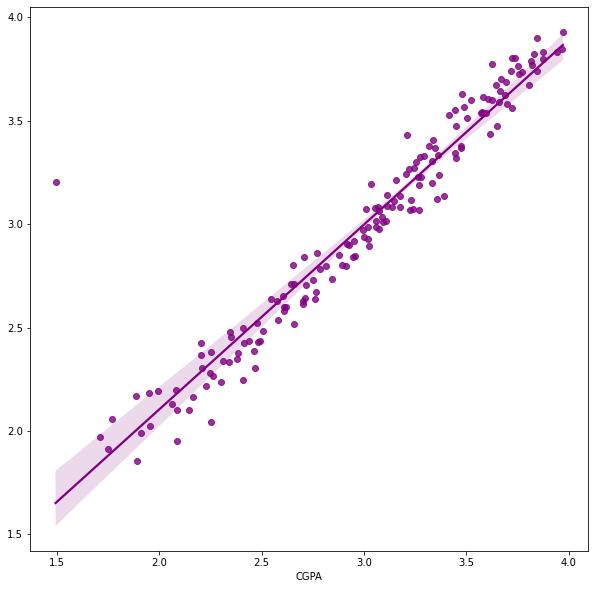

SVR()
Mean absolute error 0.08892315450047279
Mean squared error 0.028037623272678523
Root Mean squared error 0.16744438859716537
R2 Score 0.9171707317328648
---------------------------------------------------------------------------------------------------------


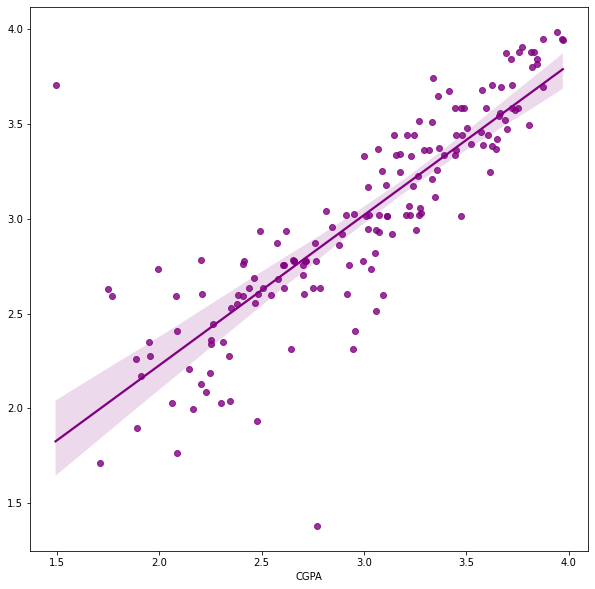

DecisionTreeRegressor()
Mean absolute error 0.20292638036809815
Mean squared error 0.10000101226993865
Root Mean squared error 0.31622936655209405
R2 Score 0.704575149193788
---------------------------------------------------------------------------------------------------------


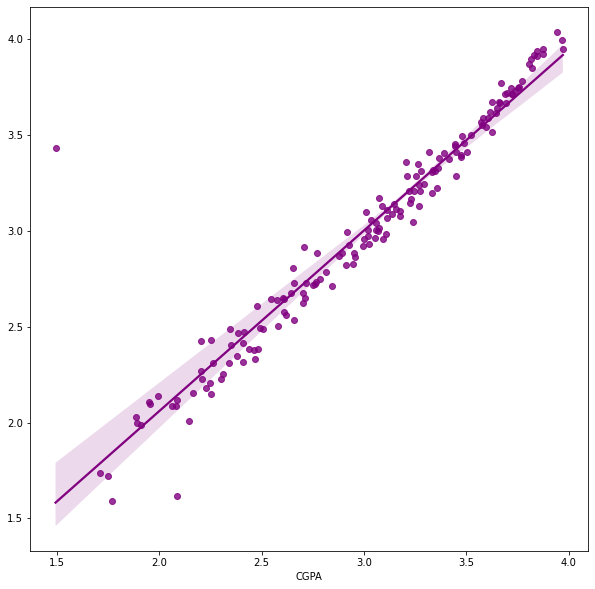

LinearRegression()
Mean absolute error 0.07564903916522522
Mean squared error 0.030533112696323788
Root Mean squared error 0.1747372676229195
R2 Score 0.9097985104529558
---------------------------------------------------------------------------------------------------------


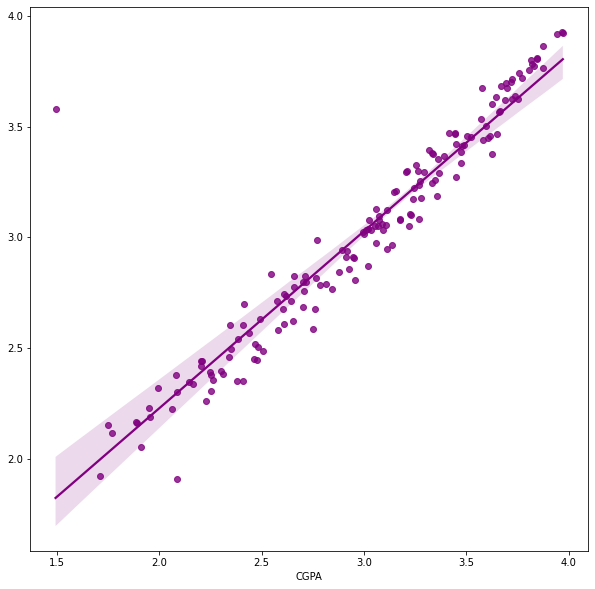

RandomForestRegressor()
Mean absolute error 0.1070943558282207
Mean squared error 0.04228002380368096
Root Mean squared error 0.20562106848200395
R2 Score 0.8750955671271706
---------------------------------------------------------------------------------------------------------


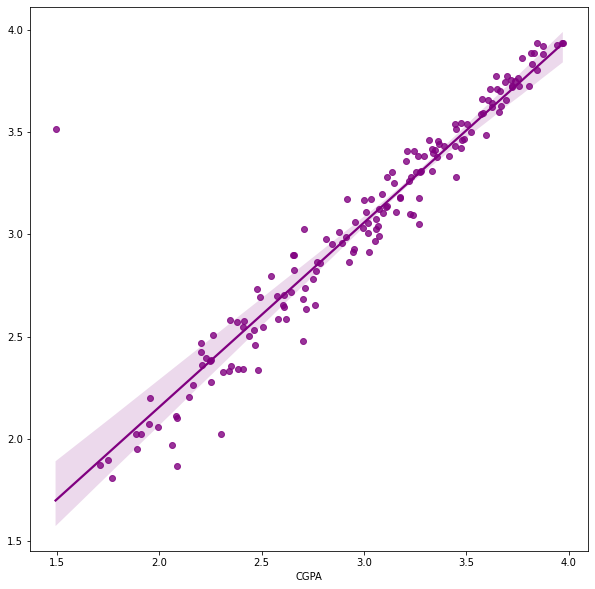

KNeighborsRegressor()
Mean absolute error 0.09890061349693254
Mean squared error 0.03762284515337422
Root Mean squared error 0.19396609279297816
R2 Score 0.8888538909352421
---------------------------------------------------------------------------------------------------------


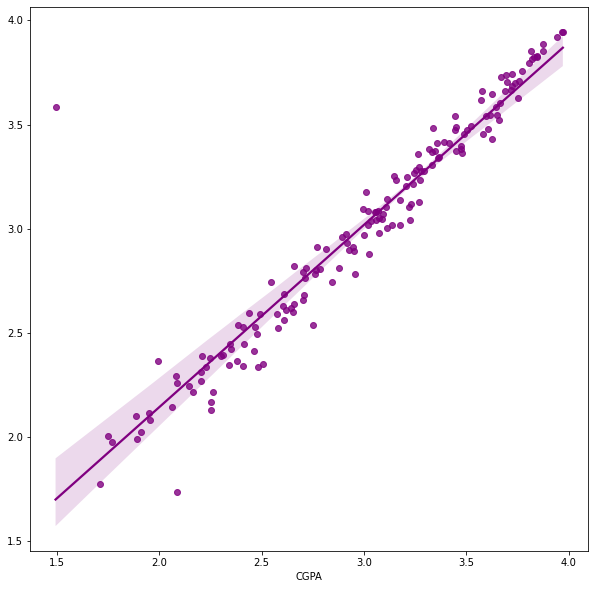

GradientBoostingRegressor()
Mean absolute error 0.0867165789172206
Mean squared error 0.03640426215228444
Root Mean squared error 0.19079900983046122
R2 Score 0.8924538515068428
---------------------------------------------------------------------------------------------------------


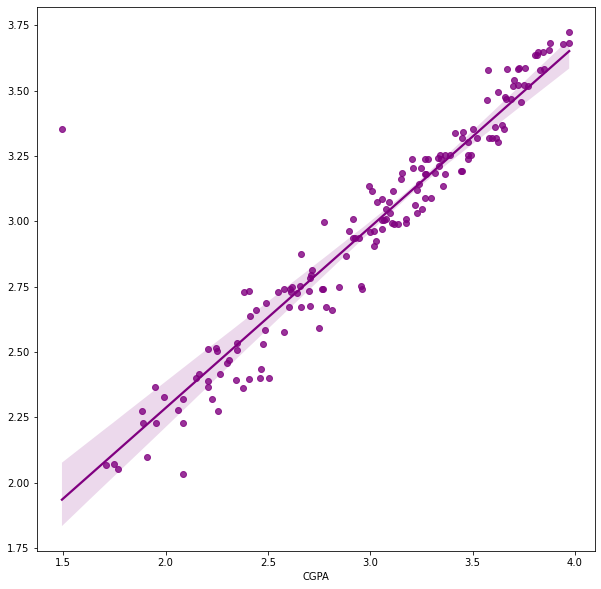

AdaBoostRegressor()
Mean absolute error 0.16144886382472165
Mean squared error 0.05270411397289376
Root Mean squared error 0.22957376586381503
R2 Score 0.8443005260258124
---------------------------------------------------------------------------------------------------------


In [301]:
for i in models:
    create_model(i)

In [302]:
svr=SVR(kernel='rbf')

In [303]:
svr_params={'C':[1,5,10,15,20,30,50],'gamma':[0.001,0.01,0.1,0.2,0.3],'epsilon':[0.01,0.1,1.0]}

In [304]:
from sklearn.model_selection import RandomizedSearchCV
RSCV = RandomizedSearchCV(svr,svr_params,cv=10,n_jobs=-1,verbose=True)

In [305]:
RSCV.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1, 5, 10, 15, 20, 30, 50],
                                        'epsilon': [0.01, 0.1, 1.0],
                                        'gamma': [0.001, 0.01, 0.1, 0.2, 0.3]},
                   verbose=True)

In [306]:
RSCV.best_params_

{'gamma': 0.001, 'epsilon': 0.01, 'C': 15}

In [307]:
Final_Model = LinearRegression(positive=True,n_jobs=10, fit_intercept=True, copy_X=True)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: -0.31993398827003805


In [308]:
Final_Model

LinearRegression(n_jobs=10, positive=True)

In [309]:
svr_params={'C':[1,5,10,15,20,30,50],'gamma':[0.001,0.01,0.1,0.2,0.3],'epsilon':[0.01,0.1,1.0]}

In [310]:

GSCV=GridSearchCV(svr,svr_params,cv=10,n_jobs=-1,verbose=True)

In [311]:
GSCV.fit(x_train,y_train)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 15, 20, 30, 50],
                         'epsilon': [0.01, 0.1, 1.0],
                         'gamma': [0.001, 0.01, 0.1, 0.2, 0.3]},
             verbose=True)

In [312]:
last_model=LinearRegression(copy_X=True,fit_intercept=True, n_jobs=1,)
CLassifer=last_model.fit(x_train,y_train)
lr_pred=last_model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

R2 score for the Final Model is: 90.97985104529558


In [314]:
last_model

LinearRegression(n_jobs=1)

CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

Regularization

In [315]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [316]:
lasso= Lasso(alpha=0.0001)

In [317]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [318]:
lasso.score(x_train,y_train)

0.9743314626611906

In [319]:
lasso_pred=lasso.predict(x_test)

In [320]:
r2_score(y_test,lasso_pred)

0.909829637808084

In [321]:
ridge=Ridge(alpha=0.1)

In [322]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [323]:
ridge.score(x_train,y_train)

0.9743315813262993

In [324]:
ridge_pred=ridge.predict(x_test)

In [325]:
r2_score(y_test,ridge_pred)

0.909801094749991

Hyper parameter tuning on the best ML Model


In [326]:
# saving the model
import joblib
joblib.dump(last_model,'Student Grades.pkl')

['Student Grades.pkl']

In [327]:
#Loading the saved model
SG=joblib.load('Student Grades.pkl')

In [328]:
prediction = SG.predict(x_test)
prediction

array([2.53759328, 3.73303443, 3.55309816, 3.71467933, 3.04706271,
       3.93938999, 3.31356917, 1.61432895, 2.7241908 , 2.47259397,
       3.20730172, 3.17084409, 2.15232316, 3.07909219, 3.59151665,
       3.00656505, 3.11662557, 3.14374821, 2.64981459, 2.57704375,
       4.03908014, 2.25460918, 2.31436879, 3.11151599, 2.9170087 ,
       2.99232446, 3.46130111, 2.30922336, 3.50175275, 3.3843943 ,
       2.49634916, 2.08807154, 2.92158506, 3.75149969, 1.58844184,
       3.51531813, 2.96076567, 3.20888278, 3.77025899, 2.73287538,
       2.50515172, 2.10936951, 2.37693911, 2.3316394 , 2.86218378,
       2.73001673, 2.38330697, 3.04194475, 2.26744082, 3.91742994,
       2.80755641, 1.99666161, 3.39613501, 3.67086162, 2.93156823,
       2.65203699, 2.41671436, 3.94762598, 2.62338698, 2.63764224,
       3.58882877, 2.92773013, 3.95019069, 2.22841337, 3.31120922,
       3.78244127, 1.71907617, 3.61689997, 2.64276584, 2.71344666,
       2.23011682, 3.41296682, 2.14824905, 2.43128187, 3.89653

In [329]:
pd.DataFrame([SG.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


0         1         2         3         4        5    \
Predicted  2.537593  3.733034  3.553098  3.714679  3.047063  3.93939   
Original   2.659000  3.736000  3.576000  3.689000  3.240000  3.84800   

                6         7         8         9    ...       153       154  \
Predicted  3.313569  1.614329  2.724191  2.472594  ...  3.433833  2.869986   
Original   3.345000  2.086000  2.763000  2.414000  ...  1.493000  2.880000   

                155       156       157       158       159       160  \
Predicted  3.377649  3.872649  2.428483  3.057371  3.619069  3.667873   
Original   3.416000  3.806000  2.206000  3.033000  3.615000  3.664000   

                161       162  
Predicted  3.017389  3.086373  
Original   3.076000  3.137000  

[2 rows x 163 columns]

In [332]:
import pickle
filename = 'Student Grades.pkl'
pickle.dump(last_model,open(filename, 'wb'))

In [333]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test,y_test)*100
print(result)

90.97985104529558
